In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import sympy as sp

from scipy.stats import norm


## Task 7

### Task 7.1

#### Task 7.1.1

Необходимо методом случайного поиска реализовать поиск минимальное значение функции. 
$$
    f(x_1, x_2) = x_1 ^ 3 \sin{ \Big( \frac{1}{x_1} \Big)} + 10x_1 x_2^4 \cos{\Big( \frac{1}{x_2} \Big)},~ x_1, x_2 \ne 0,
$$
При $x_1 = 0$ или $x_2 = 0$ функция доопределяется по непрерывности.

Рассмотрим множество, на котором необходимо оптимизировать функцию
$$
    A = \{ x_1, x_2 \in \mathbb{R}^2: x_1^2 + x_2 ^ 2 \leqslant 1 \}.
$$


$
    \forall (x_1, x_2) \in \mathbb{R}^2 \backslash (\{ x_1 = 0, x_2 \in \mathbb{R} \} \cup \{x_1 \in \mathbb{R}, x_2 = 0 \}),~ f(x_1, x_2)
$   - функция непрерывна. Докажем непрерывность на всей плоскости.
$$
    \lim_{x_{1} \to 0} x_1 ^ 3 \sin{ \Big( \frac{1}{x_1} \Big)} + 10x_1 x_2^4 \cos{\Big( \frac{1}{x_2} \Big)} = 
    \{ \text{Получаем бесконечно малую ($x_1^3$) на ограниченную последовательность $ \sin{ \Big( \frac{1}{x_1} \Big)}$}  \} = 
    0.
$$
Получили непрерывность по $x_1$, аналогично для $x_2$ и точки $(0,0)$ получаем непрерывность ф-ии на всём множестве. \
Соответственно, непрерывная функция на ограниченном множестве достигает своих максимума и минимума. 

Заметим, что $f(x_1, x_2) = f(x_1, -x_2)$, соответственно экстремумов будет минимум 2.\
Для поиска значения будем генерировать сразу $n$ точек на плоскости и будем искать минимальное значение, вычисляя $f(x_1^{i}, x_2^{i})$. \
Для оценки точности будем использовать параметр уверенности попадания(вероятность попадания $p$) в $\varepsilon$-окрестность минимума. 
Оценим вероятность того, что определённая точка попадёт в нужную окрестность одного из минимумов.
$$
    P((x_1, x_2) \in B_{\varepsilon}(x_1^{*}, x_2^{*})) = \frac{\pi \cdot \varepsilon^2}{\pi \cdot 1} = \varepsilon^2.
$$
Рассмотрим событие $A$ - $\big(x^1 \in B_{\varepsilon}(x_1^{*}, x_2^{*}) \mid \ldots \mid x^n \in B_{\varepsilon}(x_1^{*}, x_2^{*})\big)$ хотя бы одна из точек попадёт. \
Воспользуемся свойством $P(C) + P(\overline{C}) = 1$, где $\overline{C}$ - дополнение в произвольному событию $C$. \
Введём событие $B_i$ - $\big(x^i \in B_{\varepsilon}(x_1^{*}, x_2^{*}) \big)$ -  $i$-ая точка попала в окр-ть.
$$
P(\overline{A}) = \prod\limits_{i=1}\limits^{n} P(\overline{B_i}) = (P(\overline{B_i}))^n.
$$
Таким образом получаем
$$
    p = P(A) = 1 - (1- \varepsilon^2)^n. \\
    n =  \Big\lceil \frac{\ln(1-p)}{1 - \varepsilon^2} \Big\rceil
$$
Оценим погрешность вычисления. 
$$
    \frac{\partial f}{\partial x_1}(x_1, x_2) = 3x_1 ^ 2 \sin{ \Big( \frac{1}{x_1} \Big)} - x_1 \cos{ \Big( \frac{1}{x_1} \Big)} + 10 x_2^4 \cos{\Big( \frac{1}{x_2} \Big)}, \\
    \frac{\partial f}{\partial x_2}(x_1, x_2) = 40x_1 x_2^3 \cos{\Big( \frac{1}{x_2} \Big)} + 10x_1 x_2^2 \sin{\Big( \frac{1}{x_2} \Big)} \\
$$


$$
 \mid f(x_1, x_2) - f(x_1^{*}, x_2^{*}) \mid =  \mid f(x_1, x_2)-f(x_1,x_2^{*})+  f(x_1, x_2^{*})-f(x_1^{*}, x_2^{*}) \mid \leqslant \\
 \leqslant \max \limits_{x \in A}\left|\frac{\partial f}{\partial x_2}(x_1, x_2) \left\|x_2^*- x_2\left|+\max \limits_{x \in A}\right| \frac{\partial f}{\partial x_1}(x_1, x_2) \right\| x_1^*- x_1\right|
$$

Оценим частные производные функции $f$ :
$$
\begin{aligned}
&\left| \frac{\partial f}{\partial x_1}(x_1, x_2) \right|=\left|3 x_1^2 \sin \left(\frac{1}{x_1}\right)-x_1 \cos \left(\frac{1}{x_1}\right)+10 x_2^4 \cos \left(\frac{1}{x_2}\right)\right| \leqslant\left\{\left(x_1, x_2\right) \in A\right\} \leqslant \\
& \leqslant\left|3 \sin \left(\frac{1}{x_1}\right)-\cos \left(\frac{1}{x_1}\right)+10 \cos \left(\frac{1}{x_2}\right)\right| \leqslant \left\{ 3^2 + 1^2 = 10,\text{ делим и домножаем на корень из этого числа} \right\} \leqslant 10+\sqrt{10},
\end{aligned}
$$
$$
\left| \frac{\partial f}{\partial x_2}(x_1, x_2) \right|=10\left|x_1\left(4 x_2^3 \cos \left(\frac{1}{x_2}\right)+x_2^2 \sin \left(\frac{1}{x_2}\right)\right)\right|  \leqslant\left\{\left(x_1, x_2\right) \in A\right\} \leqslant \\
 \leqslant 10\left|4 \cos \left(\frac{1}{x_2}\right)+\sin \left(\frac{1}{x_2}\right)\right| \leqslant \left\{ 4^2 + 1^2 = 17,\text{ делим и домножаем на корень из этого числа} \right\} \leqslant 10 \sqrt{17}
$$

Итак, осталось воспользоваться ещё раз тем, что это координаты из $\varepsilon$-окрестности
$$
\mid f(x_1, x_2) - f(x_1^{*}, x_2^{*}) \mid \leqslant (10+\sqrt{10} + \sqrt{17}) \varepsilon
$$

Теперь учтём полученную ранее оценку и выпишем оценку как зависимость от $n$ и $p$:
$$
    \mid f(x_1, x_2) - f(x_1^{*}, x_2^{*}) \mid \leqslant (10+\sqrt{10} + \sqrt{17}) \sqrt{1 - (1 - p)^{1/n}}
$$


мн-во $A$ это шар единичного радиуса $B_1(0)$. Поэтому воспользуется переходом в полярные координаты 
$$
    \begin{cases}
        x_1 = r \cos{\varphi}, \\
        x_2 = r \sin{\varphi}.
    \end{cases}
$$
Соответственно, перепишем множество и функцию через полярные координаты
$$
    A = \{ r \in [0;1],~ \varphi \in [0; 2\pi) \}.    
$$

$$
f(r, \varphi) = r^3 \cos^3{\varphi} \sin{\Big( \frac{1}{r \cos{\varphi}} \Big)} + 10r^5 \cos{\varphi} \sin^4{\varphi} \cos{\Big( \frac{1}{r \sin{\varphi}} \Big)}.
$$



$$
|J| = \begin{vmatrix}
    \frac{\partial x}{\partial r} & \frac{\partial x}{\partial \varphi} \\
    \frac{\partial y}{\partial r} & \frac{\partial y}{\partial \varphi}
\end{vmatrix} =
\begin{vmatrix}
    \cos \varphi & -r \sin \varphi \\
    \sin \varphi & r \cos \varphi
\end{vmatrix} = r \cos^2 \varphi + r \sin^2 \varphi = r
$$

Таким образом, якобиан равен \( r \). Если у нас есть плотность вероятности $f(x_1, x_2) $ в декартовых координатах, то плотность вероятности $ g(r, \varphi) $ в полярных координатах будет:

$$
g(r, \varphi) = f(r \cos \varphi, r \sin \varphi) \cdot |J| = f(r \cos \varphi, r \sin \varphi) \cdot r.
$$
Будем моделировать $r^2 = u \sim U[0;1],~ \varphi \sim U[0;2\pi]$. \
Выпишем совместную плотность и вероятность попадания вектора во множество:
$$
    p_A(x_1, x_2) = \frac{1}{\pi} I \{ x_1^2 + x_2^2 \leqslant 1 \}, \\
    P\left(\left(x_1, x_2\right) \in A\right)=\iint\limits_{x_1^2+x_2^2 \leqslant 1} \frac{1}{\pi} d x_1 d x_2=\frac{1}{\pi} \cdot \int_0^1 r d r \int_0^{2 \pi} d \varphi=\int_0^1 d r^2 \int_0^{2 \pi} \frac{1}{2 \pi} d \varphi=\int_0^1 d u \int_0^{2 \pi} \frac{1}{2 \pi} d \varphi .
$$

In [2]:
def generate_points(size, r=1):
    if r < 0:
        raise Exception(f'Radius must be positive, given {r}')
    r = np.sqrt(np.random.uniform(low=0,high=r, size=size))
    phi = np.random.uniform(low=0,high=2 * math.pi, size=size)
    return r, phi    

def func(x1, x2):
    result = np.zeros_like(x1)  # Создаем вектор для результатов, заполненный нулями

    # Используем np.isclose для более точной проверки на близость к нулю
    idx1 = ~np.isclose(x1, 0)
    idx2 = ~np.isclose(x2, 0)

    # Вычисляем значения функции только для элементов, отличных от нуля
    result[idx1] = x1[idx1]**3 * np.sin(1/x1[idx1])
    result[idx2] = result[idx2] + 10 * x1[idx2] * x2[idx2]**4 * np.cos(1/x2[idx2])

    return result

In [3]:
def min_random_search(func, approx, p):
    estimate = (np.sqrt(10) + np.sqrt(17) + 10)
    eps = approx / estimate
    size_sample = np.ceil(np.log(1 - p) / np.log(1 - eps**2)).astype(int)
    r_sample, phi_sample = generate_points(size_sample)
    x1 = r_sample * np.cos(phi_sample)
    x2 = r_sample * np.sin(phi_sample)
    f_min = np.min(func(x1, x2))
    i_min = np.argmin(func(x1, x2))

    return f_min, np.array([x1[i_min], x2[i_min]]), size_sample

In [4]:

eps = 0.05
p = 0.99
val, point, size_sample = min_random_search(func, eps, p)
print(f"func({point[0]},{point[1]})= {val} approx by size_sample = {size_sample}")

func(-0.3446470650579569,-0.9385883141372646)= -1.2851638464237674 approx by size_sample = 550380


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


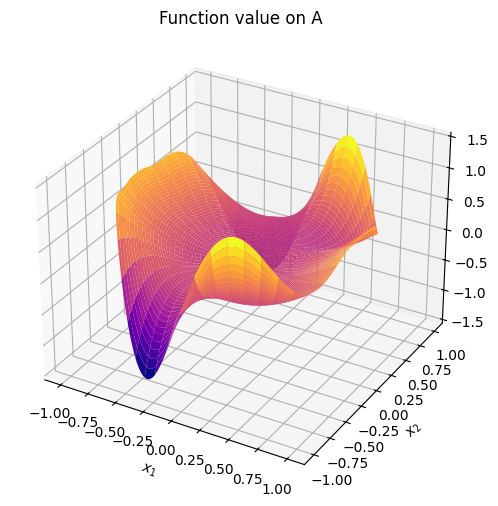

In [6]:
n_points = 10 ** 3
r = np.linspace(0, 1, n_points)
phi = np.linspace(0, 2*np.pi, n_points, endpoint=False)
r, phi = np.meshgrid(r, phi)

X = r * np.sin(phi)
Y = r * np.cos(phi)
Z = func(X, Y)


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_title('Function value on A')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlim([-1.5, 1.5])

plt.savefig('7_1.eps', format='eps')
plt.show()

#### Task 7.1.2

Метод имитации отжига(simulated annealing) для функции Розенборка
$$
    g(x) = (x_1 - 1)^2 + 100(x_2 - x_1^2)^2.
$$
Минимальное значение функции достигается в точке $x^{*} = (1, 1),~ g(x^{*}) = 0$

В самом начале задаём входные параметры $m$, $\sigma$, $t_0$ и начальное значение $(x_0, y_0)$.

Кандидата на следующую точку вычисляем по правилу:
$$
    x_{i+1} \sim \N ( x_i, \sigma^2 T_i). \\
    y_{i+1} \sim \N ( y_i, \sigma^2 T_i).
$$
Для определения будет ли осуществляться переход вычисляем приращение функции $\Delta g$ при переходе в следующую точку. \
Если $\Delta g \leqslant 0$, то мы переходим в новую точку. \
Иначе переход осуществляется с вероятностью $p_k = \frac{1}{2} \exp(- \frac{\Delta g}{t_k})$. \
Температуру будем понижать по закону
$$
    T_{k+1} = k T_k.
$$
Медленно понижаем температуру, если приращения функции большие.
Проведено было ещё несколько экспериментов с функцией понижения температуры, но результаты не были удачными.


In [10]:
def exp_distr(lmbd, size):
    if lmbd < 0:
        raise Exception(f'This is not lambda, given {lmbd}, must be positive')
    if np.any(size < 0):
        raise Exception(f'Invalid size {size}')
    # np.random.rand?
    data_uniform = np.random.uniform(low=0, high=1, size=size)    
    exp_sample = - np.log(data_uniform) / lmbd
    return exp_sample

In [21]:
def box_muller_one(n=1):
    if n < 0:
        raise Exception(f'Invalid size {n}')
   
    U1 = np.random.rand(n)
    U2 = exp_distr(0.5, n)
    Z0 = np.sqrt(U2) * np.cos(2 * np.pi * U1)
    return Z0

In [17]:

def box_muller(n=1):
    if n < 0:
        raise Exception(f'Invalid size {n}')
   
    U1 = np.random.rand(n)
    U2 = exp_distr(0.5, n)
    Z0 = np.sqrt(U2) * np.cos(2 * np.pi * U1)
    Z1 = np.sqrt(U2) * np.sin(2 * np.pi * U1)
    return Z0, Z1

In [13]:
def Bernoulli_schemes(p, size=1):
    '''
        p - probability, 
        0 <= p <= 1
        size - np.array or  type which can be converted to it
    '''
    if type(size) is not np.ndarray:
        size = np.array(size)
    if p < 0 or p > 1:
        raise Exception(f'This is not probability must [0;1], given {p}')
    if np.any(size < 0):
        raise Exception(f'Invalid size {size}')
    # np.random.rand?
    data_uniform = np.random.uniform(low=0, high=1, size=size)    
    return np.array(data_uniform < p, dtype=int)

In [14]:
def Rosenbrock_func(x):
    return (x[0] - 1) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

def temp_func2(k, val):
    return k * val

def temp_func3(alpha, val):
    return 1 / (1 + alpha * val)

def temp_func4(alpha, eps, val, temperature):
    print(f" temp ={(temperature + eps)}")
    print(f"E =  {alpha * val}")
    return np.exp(alpha * val / (temperature + eps))


def prob_func(temp, val):
    return np.exp(- val / temp) / 2

In [19]:
def sim_annealing(func, m, sigma, t0, x0, y0, temp_func, prob_func, final_temp = 0, eps=1e-5, temp_eps=1e-2):
    if m <= 0:
        raise Exception(f'Invalid m {m}')
    if sigma <= 0:
        raise Exception(f'Invalid std {sigma}')
    
    temp = lambda val : temp_func(m, val) #comibation 1
    #temp = lambda val, temperature : temp_func(m, temp_eps, val, temperature) #comibation 2
    t = t0
    coord = np.array([x0, y0])
    g_val = func(coord)
    counts = 0
    while abs(t - final_temp) > eps:
        coord_prob = sigma * t * box_muller_one() + coord
        g_val_prob = func(coord_prob)

        delta_g = g_val_prob - g_val
        if delta_g < 0:
            coord = coord_prob
            g_val = g_val_prob
        else:
            pk = prob_func(t, delta_g)
            if Bernoulli_schemes(pk):
                coord = coord_prob
                g_val = g_val_prob
            t = temp(t)
            #t *= temp(delta_g, t) # combination 2
            #print(f"temp = {t}")
        counts += 1
    #print(f"counts = {counts}")
    return coord, g_val, counts

In [22]:
m = 0.55
sigma = 1
t0 = 2
x0 = 1.5
y0 = 1.5
final_temp = 0
sim_annealing(Rosenbrock_func, m, sigma, t0, x0, y0, temp_func2, prob_func, final_temp)

(array([0.02823721, 0.02823721]), 1.019617573131233, 34)

In [ ]:
#alpha = 5e-2
#sim_annealing(Rosenbrock_func, alpha, sigma, t0, x0, y0, temp_func3, prob_func, final_temp)

In [ ]:
# Need to change combination in function
#alpha2 = 1e-4
#sim_annealing(Rosenbrock_func, alpha2, sigma, t0, x0, y0, temp_func4, prob_func, final_temp)

In [23]:
true_point = np.array([1, 1])

In [42]:
alpha = 0.99
final_temp = 0
N = 10 ** 2
points = np.zeros([2, N])
values = np.zeros(N)
counts = np.zeros(N)

for i in range(N):
    points[:, i], values[i], counts[i] = sim_annealing(Rosenbrock_func, alpha, sigma, t0, x0, y0, temp_func2, prob_func, final_temp)

In [43]:

shift_x = np.abs(points - true_point[np.newaxis, :].T)

dist = np.sqrt(shift_x[0, :] ** 2 + shift_x[1, :] ** 2)

In [44]:

print(f"average value {values.mean()}")
print(f"median value {np.median(values)}")
print(f"mean points {points[0, :].mean(), points[1, :].mean()}")
print(f"median points {np.median(points[0, :]), np.median(points[1, :])}")
print(f"average dist {dist.mean()}")
print(f"median dist {np.median(dist)}")


average value 0.0791918136723309
median value 1.7735270887528834e-08
mean points (0.9208167754084263, 0.9208167754084263)
median points (0.999998143996338, 0.999998143996338)
average dist 0.11200621143422225
median dist 1.8735319802434395e-05


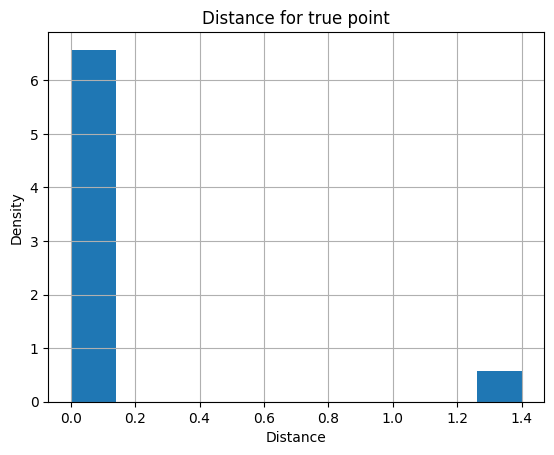

In [45]:
plt.clf()  

%matplotlib inline


plt.hist(dist, density=True)
plt.title('Distance for true point')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.grid()
plt.savefig('7_1(point).eps', format='eps')
plt.show()


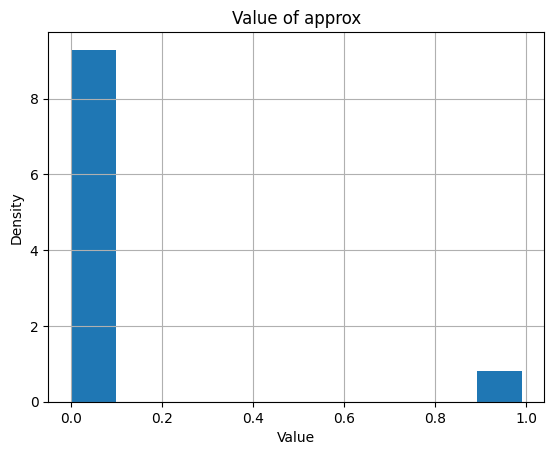

In [46]:
plt.clf()  

%matplotlib inline


plt.hist(values, density=True)
plt.title('Value of approx')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()
plt.savefig('7_1(value).eps', format='eps')
plt.show()


Если смотреть только на отклонения для получаемых точек, то можно сделать вывод, что метод работает плохо, однако, при рассмотрении графика разности значений приближённых вычислений, получаем довольно хороший ответ

### Task 8

1. Применить метод Монте-Карло к решению первой краевой задачи для двумерного уравнения Лапласа в единичном круге
$$
    \begin{cases}
    \Delta u=0,~ (x, y) \in D \\
    \left.u\right|_{\delta D}=f(x, y) \\
    u \in C^2(D), f \in C(\delta D) \\
    D=\left\{(x, y) \in \mathbb{R}^2: x^2+y^2 \leqslant 1\right\}
    \end{cases}
$$
2. Для функции $f(x, y)=x^2-y^2$ найти аналитическое решение и сравнить с полученным по методу Монте-Карло.

Воспользуемся переходом в полярные координаты
$$
    \begin{cases}
        x = r \cos{\varphi}, \\
        y = r \sin{\varphi}.
    \end{cases}
$$

Таким образом перепишем задачу
$$
    \begin{cases}
    \Delta u=0,~ (x, y) \in D \\
    u(1, \varphi)= g(\varphi) \\
    u \in C^2(D), f \in C([0; 2\pi]) \\
    D= \{ r \in [0;1],~ \varphi \in [0;2\pi] \}
    \end{cases}
$$

Решим для данной функции $f(x,y)$. Перепишем её в полярных координатах
$$
    g(\varphi) = \cos(2\varphi). \\
        
    \begin{aligned}
    & \alpha_0 = \frac{1}{2 \pi} \int_0^{2 \pi} \cos 2 \varphi d\varphi=\frac{1}{2 \pi} \cdot-\left.\sin 2\right|_0 ^{2\pi}=0 \\
    & \alpha_2 = \frac{1}{\pi} \int_0^{2\pi} \cos ^2(2 \varphi) d\varphi=\frac{1}{2\pi} \int_0^{2 \pi}(1+\cos (4\varphi) ) d \varphi = 1 \\
    \end{aligned} \\
    \forall n : n \ne 2 \implies \alpha_n = 0, \\
    \forall n \implies \beta_n = 0. \\
$$
Получаем решение в виде
$$
    u(r, \varphi)=r^2 \cdot \cos 2 \varphi = r^2 (\cos^2(\varphi) - \sin^2(\varphi)), \\
    u(x, y) = x^2 - y^2.
$$



генерирует большую сетку
Получаем внутренние точки
Получаем значения на границе

матрица из коэффициентов значений (посчитать заранее)? Или просто каждое значение на ходу считать

Генерировать случайное блуждание


In [47]:
def f(x, y):
    return x**2 - y**2


In [48]:
def laplace_monte_carlo(f, N = 10, num_walks=10000, num_steps=100):
    """
    Решение уравнения Лапласа методом Монте-Карло в единичном круге
    
    Аргументы:
    - f: функция граничных условий
    - num_walks: количество случайных блужданий
    - num_steps: максимальное количество шагов в блуждании
    """
    def is_inside_circle(x, y):
        return x*x + y*y < 1.0

    def random_walk(start_x, start_y):
        """Реализация случайного блуждания"""
        x, y = start_x, start_y
        for _ in range(num_steps):
            # Случайный шаг с малым приращением
            dx = np.random.uniform(-0.1, 0.1)
            dy = np.random.uniform(-0.1, 0.1)
            
            # Проверка нахождения точки внутри круга
            if not is_inside_circle(x + dx, y + dy):
                break
            
            x, y = x + dx, y + dy
        
        return x, y

    # Создание сетки
    h = 1 / N  # шаг сетки
    x = np.arange(-1, 1+h, h)
    y = np.arange(-1, 1+h, h)
    X, Y = np.meshgrid(x, y)
    
    # Маска внутренних точек круга
    mask = X*X + Y*Y < 1.0
    
    # Массив для хранения решения
    solution = np.zeros_like(X)
    counts = np.zeros_like(X)
    
    # Получаем индексы внутренних точек
    internal_indices = np.argwhere(mask)
    size_indices = len(internal_indices)
    
    # имитация Монте-Карло с использованием num_walks
    for _ in range(num_walks):
        # Случайный выбор внутренней точки
        idx = internal_indices[np.random.randint(size_indices)]
        start_x, start_y = X[idx[0], idx[1]], Y[idx[0], idx[1]]
        
        # Случайное блуждание
        end_x, end_y = random_walk(start_x, start_y)
        
        # Получение значения на границе
        boundary_val = f(end_x, end_y)
        #if boundary_val > 0.5:
        #    print(boundary_val)
        #elif boundary_val < -0.5:
        #    print(f"Beg val {boundary_val}")
        
        # Усреднение результатов
        solution[idx[0], idx[1]] += boundary_val
        counts[idx[0], idx[1]] += 1
    
    # Усреднение по количеству блужданий
    counts[counts == 0] = 1
    solution /= counts
    
    return solution, X, Y, mask

def boundary_f(x, y):
    return x*x - y*y

In [49]:
# Запуск моделирования
solution, X, Y, mask = laplace_monte_carlo(boundary_f, N=20 ** 1, num_walks=10 ** 5, num_steps=200)

In [50]:
def analytical_solution(x, y):
    return x*x - y*y


In [51]:
# Аналитическое решение для сравнения
analytical = analytical_solution(X, Y)

# Расчет ошибки
error = np.zeros_like(solution)
error[mask] = np.abs(solution[mask] - analytical[mask])


In [54]:

# Статистика ошибки
print(f"Средняя абсолютная ошибка: {np.mean(error[mask])}")
print(f"Максимальная абсолютная ошибка: {np.max(error[mask])}")
print(f"Стандартное отклонение ошибки: {np.std(error[mask])}")

Средняя абсолютная ошибка: 0.061398130112653125
Максимальная абсолютная ошибка: 0.24144275680479982
Стандартное отклонение ошибки: 0.0450466053599302


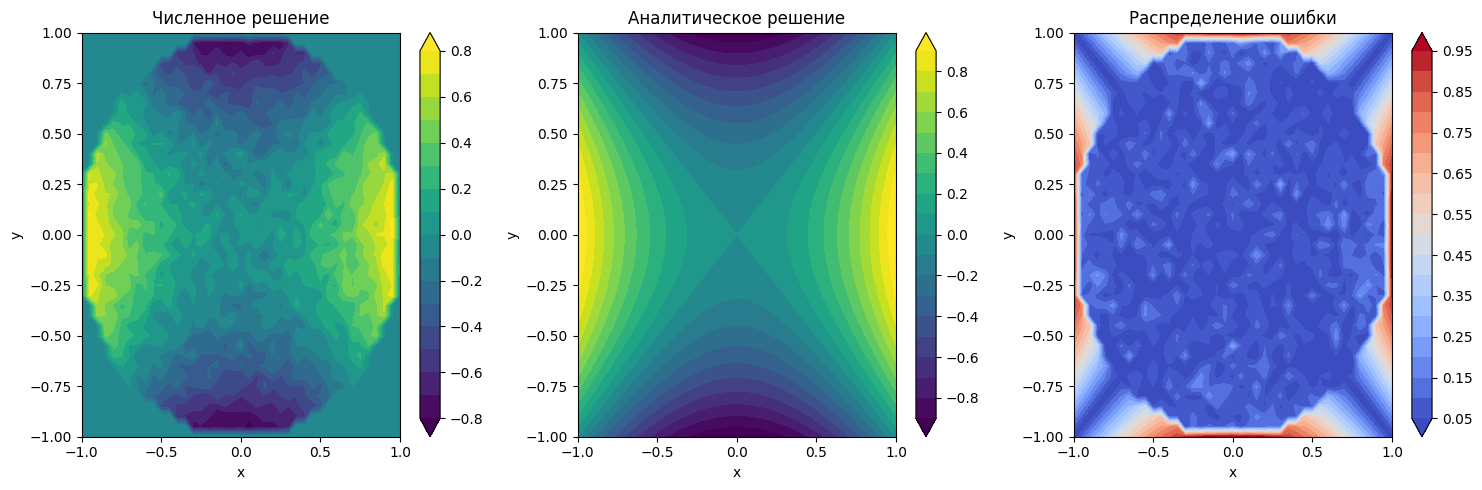

In [55]:

# Визуализация
plt.figure(figsize=(15,5))

# Численное решение
plt.subplot(131)
plt.title('Численное решение')
plt.contourf(X, Y, solution, levels=20, cmap='viridis', extend='both')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

# Аналитическое решение
plt.subplot(132)
plt.title('Аналитическое решение')
plt.contourf(X, Y, analytical, levels=20, cmap='viridis', extend='both')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

# Визуализация ошибки
plt.subplot(133)
plt.title('Распределение ошибки')
plt.contourf(X, Y, error, levels=20, cmap='coolwarm', extend='both')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.savefig('8_1.eps', format='eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


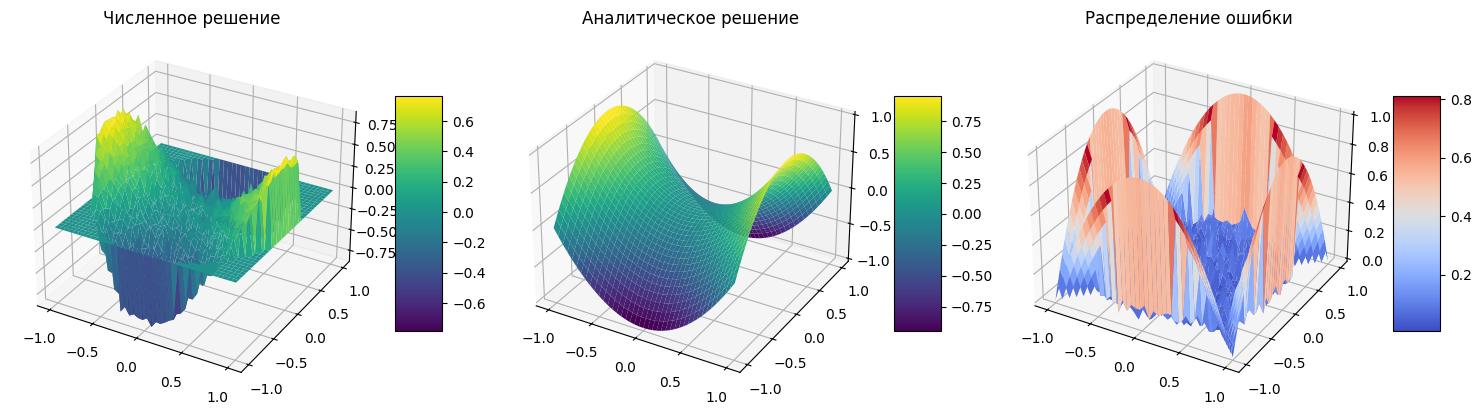

In [56]:
fig = plt.figure(figsize=(15,5))

# 3D численное решение
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X, Y, solution, cmap='viridis')
ax1.set_title('Численное решение')
fig.colorbar(surf1, shrink=0.5, aspect=5)

# 3D аналитическое решение
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X, Y, analytical_solution(X, Y), cmap='viridis')
ax2.set_title('Аналитическое решение')
fig.colorbar(surf2, shrink=0.5, aspect=5)

# 3D ошибка
ax3 = fig.add_subplot(133, projection='3d')
error = np.abs(solution - analytical_solution(X, Y))
surf3 = ax3.plot_surface(X, Y, error, cmap='coolwarm')
ax3.set_title('Распределение ошибки')
fig.colorbar(surf3, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig('8_2.eps', format='eps')
plt.show()

##### Тут была попытка написать это в один цикл 
(Работает оно как-то не так)
Можно просто скрыть перейдёт сразу к следующему заданию

In [ ]:
def f(x, y):
    return x**2 - y**2


In [26]:
def laplace_monte_carlo_improved(f, N=100, count_step=10):
    """
    Улучшенный алгоритм решения задачи методом Монте-Карло.

    Args:
        f: Функция, задающая граничные условия.
        N: Количество итераций.
        step_size: Размер шага случайного блуждания.
    """
    h = 1 / N
    x = np.arange(-1, 1 + h, h)
    y = np.arange(-1, 1 + h, h)
    X, Y = np.meshgrid(x, y)
    
    # Определение внутренних и граничных точек
    inside_circle = (X ** 2 + Y ** 2 < 1) & ~(np.isclose(X ** 2 + Y ** 2 , 1))
    
    # Получаем индексы точек внутри круга
    indices_in_circle = np.argwhere(inside_circle)

    # Случайным образом выбираем один индекс из точек внутри круга
    random_index = np.random.choice(indices_in_circle.shape[0])

    index_now = indices_in_circle[random_index, :]

    x_now = X[index_now[0], index_now[1]]
    y_now = Y[index_now[0], index_now[1]]

    visited_count = np.zeros([2 * N + 1, 2 * N + 1])
    values = np.zeros([2 * N + 1, 2 * N + 1])

    # Список возможных направлений
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

    row_to_add = [] # индексы тех значений, через которые прошли(используем марковость для заполнения)
    col_to_add = []

    while np.any(visited_count < count_step):
        if (x_now ** 2 + y_now ** 2 >= 1) or (np.isclose(x_now ** 2 + y_now ** 2 , 1)):
            #print(row_to_add)
            #print(col_to_add)
            #print(f(x_now, y_now))
            np.add.at(visited_count, (row_to_add, col_to_add), 1) # добавляю по 1 посещению (с учётом повторов)
            np.add.at(values, (row_to_add, col_to_add), f(x_now, y_now))
            # row_to_add = [], col_to_add = []
            not_visited = np.argwhere( (inside_circle) & (visited_count < count_step))
            if not_visited.shape[0] == 0:
                print('End')
                break
            random_index = np.random.choice(not_visited.shape[0])

            index_now = not_visited[random_index, :]
            

            x_now = X[index_now[0], index_now[1]]
            y_now = Y[index_now[0], index_now[1]]
            
        else:
            direct = random.choice(directions)
            index_now += direct
            x_now = X[index_now[0], index_now[1]]
            y_now = Y[index_now[0], index_now[1]]
            row_to_add.append(index_now[0]) # запоминаю пройденные положения
            col_to_add.append(index_now[1])
    
    print(visited_count.max())
    visited_count[visited_count == 0 ] = 1
    return values / visited_count, visited_count

In [27]:
N = 50
# Создаем функцию, приближающую решение
values, visited_count = laplace_monte_carlo_improved(f, N=N)


End
21433.0


In [82]:

def visualize(values, x_min=-1, x_max=1, y_min=-1, y_max=1, num_points=100 + 1):
    """
    Визуализирует решение уравнения Лапласа.

    Args:
        u: Функция, представляющая решение уравнения Лапласа.
        x_min, x_max, y_min, y_max: Границы области.
        num_points: Количество точек в сетке для построения графика.
    """

    # Создаем сетку точек
    x = np.linspace(x_min, x_max, num_points)
    y = np.linspace(y_min, y_max, num_points)
    X, Y = np.meshgrid(x, y)
    #Z = X ** 2 - Y ** 2
    #errors = values - Z
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_surface(X, Y, errors, cmap='plasma')
    ax.plot_surface(X, Y, values, cmap='plasma')
    #ax.plot_surface(X, Y, Z, cmap='plasma')
    ax.set_title('Approx values on A')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    #ax.set_zlim([-1.5, 1.5])

    # Вращение с помощью мыши
    plt.show()

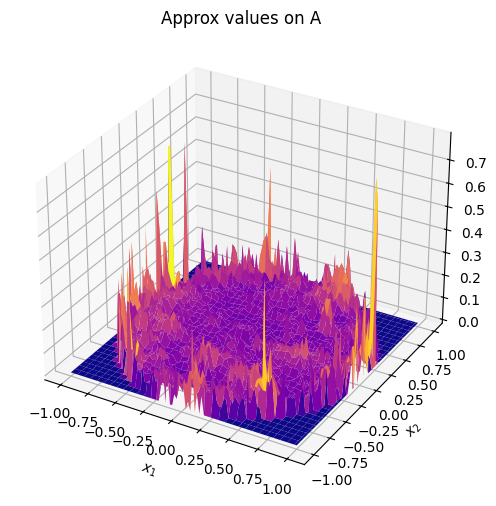

In [83]:
visualize(values, num_points=2 * N+1)

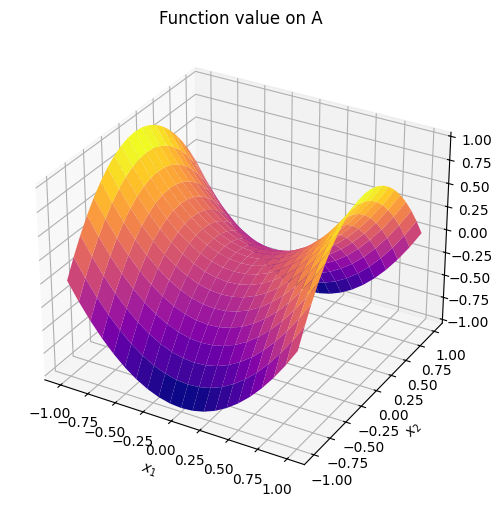

In [ ]:
x_min=-1
x_max=1
y_min=-1
y_max=1 
num_points=2 * N + 1

x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x, y)
Z = X ** 2 - Y ** 2

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_title('Function value on A')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
#ax.set_zlim([-1.5, 1.5])

# Вращение с помощью мыши
plt.show()

### Task 9

Рассмотреть два вида гауссовских процессов:
- Винеровский процесс $W (t), t \in [0; 1], W(0) = 0$. 
- Процесс Орнштейна–Уленбека $X(t), t \in [0; 1], X(0) = X_0$ , т.е. стационарный марковский гауссовский процесс. \
Начальные значения X0 следует выбирать случайным образом так, чтобы полученный процесс был стационарным.\
Для данных процессов:
1. Найти ковариационную функцию и переходные вероятности.
2. Промоделировать независимые траектории процесса с данными переходными
вероятностями методом добавления разбиения отрезка.
3. Построить график траектории, не соединяя точки ломаной, с целью получения
визуально непрерывной линии.

Винеровский процесс — процесс такой, что
$$
    1. W(0) \stackrel{п.в.}{=} 0, \\
    2. W(t+h) - W(t) \sim N(0, \sigma^2h), \\
    3. W(t) - процесс~ с~ независимыми~ приращениями.
$$
Теперь, пользуясь определением найдём ковариационную функцию $\mathbb{K}(t_1, t_2)$ при условии $t_1 < t_2$:
$$
    \begin{align*}
    \mathbb{K}(t_1, t_2) &= \mathbb{E}[W(t_1)W(t_2)] = \Big\{ W(t_1)W(t_2) = W(t_1) \big(W(t_2) - W(t_1) + W(t_1) \big) =  (W(t_1))^2 + W(t_1) \big(W(t_2) - W(t_1)) \Big\} =\\
    &= \mathbb{E}[W^2(t_1)] + \mathbb{E}[(W(t_1) - W(0))(W(t_2) - W(t_1))] = \{ процесс~ с~ независимыми~ приращениями \} = \\
    &= \sigma^2 t_1 + \mathbb{E}[W(t_1) - W(0)]\mathbb{E}[W(t_2) - W(t_1)] = \{ воспользовались~ вторым~ пунктом~ определения.\} = \sigma^2 t_1. 
    \end{align*}
$$

Таким образом, ковариационная функция винеровского процесса имеет вид:
$$
    \mathbb{K}(t_1, t_2) = \min(t_1, t_2)\sigma^2.
$$
По определению известно, что $W(0) = 0$ и $[W(t) \mid W(0)] \sim N(0, \sigma^2t)$. \
Промоделируем переходные вероятности \
Пусть $\exists t_1, t_3 \in [0;1] : t_1 \ne t_3$, зная значения $W(t_1), W(t_3)$ в эти моменты времени найдём значение в точке $t_2 = \frac{t_1 + t_3}{2}$. 
$$
    Z = (W(t_2) \mid W(t_1)=w_1, W(t_3) = w_3).
$$
Воспользуемся тем фактов, что Винеровский процесс является гауссовским
$$
    \rho_Z(w_2) = \frac{\rho_{t_1,t_2,t_3}(w_1, w_2, w_3)}{\rho_{t_1, t_3}(w_1, w_3)},
$$
где $\rho_{t_1, t_2, t_3}(w_1, w_2, w_3)$ - совместная плотность значений винеровского процесса во всех трёх моментах времени, а $\rho_{t_1, t_3}(w_1, w_3)$ - значения, в двух известных моментах времени. \
Плотность многомерного нормального распределения с нулевым средним и ковариационной матрицей $\Sigma$ имеет вид
$$
    \rho(w_1, w_2, \dots, w_n) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} \exp \Big\{- \frac{1}{2} x\Sigma x^T\Big\}.
$$
Теперь, запишем ковариационные матрицы для обоих векторов

$$
\Sigma_{t_1,t_3} = \sigma^2
\begin{pmatrix}
t_1 & t_1 \\
t_1 & t_3
\end{pmatrix}
$$

$$
\Sigma_{t_1,t_2, t_3} = \sigma^2
\begin{pmatrix}
t_1 & t_1 & t_1 \\
t_1 & t_2 & t_2 \\
t_1 & t_2 & t_3
\end{pmatrix}
$$

С помощью символьных вычислений получим плотность $Z$. \
Для упрощения сразу воспользуюсь тем, что $t_2 = t_1 + h, t_3 = t_1 + 2h$.  

In [95]:

# Определяем символы
w1, w2, w3 = sp.symbols('w1 w2 w3')  # Значения W(t1), W(t2), W(t3)
t1, h, sigma = sp.symbols('t1 h sigma')  # Временные точки и дисперсия

# Определяем ковариационные матрицы
Sigma_123 = sigma ** 2 * sp.Matrix([
    [t1, t1, t1],
    [t1, t1+h, t1+h],
    [t1, t1+h, t1+2*h]
])

Sigma_13 = sigma ** 2 * sp.Matrix([
    [t1, t1],
    [t1, t1+2*h]
])

# Совместные плотности
def normal_density_exp(x, mu, sigma):
    #"""Функция плотности многомерного нормального распределения."""
    sigma_inv = sigma.inv()
    exponent = -1 / 2 * ((x - mu).T @ sigma_inv @ (x - mu))[0]
    return exponent

# Совместная плотность p_123(w1, w2, w3)
w_123 = sp.Matrix([w1, w2, w3])
mu_123 = sp.Matrix([0, 0, 0])
exp_123 = normal_density_exp(w_123, mu_123, Sigma_123)

# Совместная плотность p_13(w1, w3)
w_13 = sp.Matrix([w1, w3])
mu_13 = sp.Matrix([0, 0])
exp_13 = normal_density_exp(w_13, mu_13, Sigma_13)


In [96]:
new_Sigma = (Sigma_123.det() / Sigma_13.det()).simplify()
new_Sigma

h*sigma**2/2

In [97]:
new_exp = (exp_123.simplify() - exp_13.simplify()).simplify()
sp.factor(new_exp)

-1.0*(0.5*w1 - 1.0*w2 + 0.5*w3)**2/(h*sigma**2)

Обозначим $ {d_2'} = \frac{\sigma^2 h}{2}$. \
Тогда перепишем показатель экспоненты в виде
$$
    - \frac{(w_2 - \frac{w_1 + w_3}{2}) ^ 2}{2d_2'}.
$$
Соответственно, получаем, что
$$
    Z \sim N \Big(\frac{w_1 + w_3}{2}, \sqrt{d_2'} \Big)
$$

Теперь опишем как будем моделировать метод разбиения отрезка:


In [107]:
n = 10  # Количество элементов в массиве
array = np.linspace(n, 0, n+1)
array = 2**(-array)

print(array)

[9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00]


In [58]:
def wiener_process_midpoint(n_steps, sigma=1):
    if sigma < 0:
        raise ValueError(f'Sigma must be positive, given {sigma}')

    # Инициализация массивов времени и значений процесса
    t = np.linspace(0, 1, 2 ** (n_steps + 1) + 1)
    w = np.zeros_like(t)
    
    w[0] = 0
    w[-1] = sigma * box_muller_one()
    
    # Итеративное добавление точек
    for level in range(n_steps):
        step_size = 2 ** (n_steps - level)
        
        for i in range(0, len(t) - 1, step_size):
            # Индекс середины интервала
            mid_index = i + step_size // 2
            
            # Вычисление средних точек
            t_left, t_right = t[i], t[i + step_size]
            w_left, w_right = w[i], w[i + step_size]
            
            # Расчет среднего и стандартного отклонения для серединной точки
            w_mid_mean = (w_left + w_right) / 2
            w_mid_std = np.sqrt((t_right - t_left) / 2) * sigma
            
            # Генерация значения в серединной точке
            w[mid_index] = np.random.normal(w_mid_mean, w_mid_std)
            w[mid_index] = w_mid_mean + w_mid_std * box_muller_one()
            
    return t, w


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


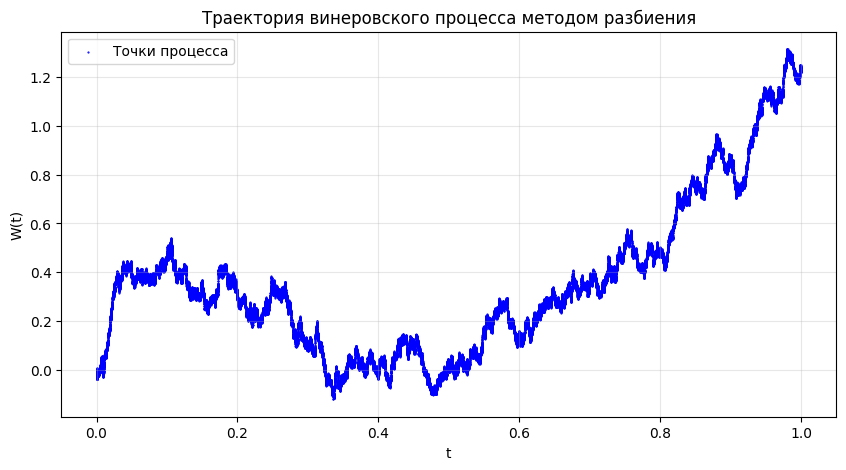

In [59]:
# Генерация траектории
n_steps = 15  # Количество уровней разбиения
t, w = wiener_process_midpoint(n_steps, sigma=0.5)

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(t, w, s=0.3, color="blue", label="Точки процесса")  # Используем scatter для отображения точек
plt.title("Траектория винеровского процесса методом разбиения")
plt.xlabel("t")
plt.ylabel("W(t)")
plt.legend()
plt.grid(alpha=0.3)

plt.savefig('9_1.eps', format='eps')

plt.show()


Воспользуемся стационарностью процесса Орнштейна-Уленбека. Введём обозначения
$$
    \mathbb{E}X_t = a = const,~ \mathbb{Var}X_t = \sigma^2 = const,~ \mathbb{K}(t, s) = k(|t-s|).
$$
Исходя из стационарности ковариационная функция зависит только от разности аргументов, а следовательно и корреляционная $R(t, s) = \frac{\mathbb{K}(t,s)}{\sqrt{\mathbb{Var}X_s} \sqrt{\mathbb{Var}X_t}} = r(|t-s|)$. \
Воспользуемся свойством такого процесса, что 
$$
    R(X(t_1), X(t_3)) = R(X(t_1), X(t_2)) R(X(t_2), X(t_3)), ~ t_1 < t_2 < t_3.
$$
Запишем корреляционную функцию в виде
$$
    r(t_2) = R(X(t_2), X_0) = \{ теперь~ воспользуемся~ свойством  \} = R(X(t_2), X(t_1)) R(X(t_1), X_0) = r(t_2 - t_1) r(t_1).
$$
Получаем уравнение (после переобозначения), которое будет являться функциональным уравнением Коши
$$
    r(t+ \tau) = r(t) r(\tau).
$$
Для которого в классе непрерывных функций существует нетривиальное решение в виде $r(t) = \exp^{ - \theta x},~ \theta > 0$. \
Таким образом, ковариационная функция принимает вид
$$
    R(t, s) = \sigma^2 \exp^{- \theta |t-s|}.
$$

Промоделируем переходные вероятности для начального случая. \
$X_0 \sim N(0, \sigma^2),~ $ Ковариационная матрица имеет вид
$$
\Sigma_{0,1} = \sigma^2
\begin{pmatrix}
1 & e^{-\theta} \\
e^{-\theta} & 1
\end{pmatrix}
$$


In [183]:

# Определяем символы
w1, w0 = sp.symbols('w1 w0')  # Значения W(t1), W(t0)
t1, sigma, theta = sp.symbols('t1 sigma theta')  # Временные точки и дисперсия

# Определяем ковариационные матрицы
Sigma_01 = sigma ** 2 * sp.Matrix([
    [1, sp.exp(- theta)],
    [sp.exp(- theta), 1]
])

# Совместные плотности
def normal_density_exp(x, mu, sigma):
    #"""Функция плотности многомерного нормального распределения."""
    sigma_inv = sigma.inv()
    exponent = -1 / 2 * ((x - mu).T @ sigma_inv @ (x - mu))[0]
    return exponent

# Совместная плотность p_13(w1, w3)
mu_1 = sp.Matrix([0])
exp_1 = normal_density_exp(sp.Matrix([w1]), mu_1, sp.Matrix([sigma ** 2]))


# Совместная плотность p_13(w1, w3)
w_10 = sp.Matrix([w1, w0])
mu_10 = sp.Matrix([0, 0])
exp_10 = normal_density_exp(w_10, mu_10, Sigma_01)




In [47]:
new_Sigma_10 = (Sigma_01.det() / sigma ** 2).simplify()
new_Sigma_10

sigma**2 - sigma**2*exp(-2*theta)

In [44]:
sp.factor((exp_10 - exp_1).simplify())

-0.5*(1.0*w0*exp(theta) - 1.0*w1)**2/(sigma**2*(exp(theta) - 1)*(exp(theta) + 1))

In [184]:
del w1, w0, sigma, theta

Осталось домножить и числитель, и знаменатель на $e^{-2\theta}$
$$
    \Big( X_1 \mid X_0 \Big) \sim N(w_0 e^{-\theta}, \sigma^2 (1 -e^{-2 \theta}))
$$ 

Промоделируем переходные вероятности для промежуточных моментов \
Пусть $\exists t_1, t_3 \in [0;1] : t_1 \ne t_3$, зная значения $W(t_1), W(t_3)$ в эти моменты времени найдём значение в точке $t_2 = \frac{t_1 + t_3}{2}$. 
$$
    Z = (W(t_2) \mid W(t_1)=w_1, W(t_3) = w_3).
$$
Воспользуемся тем фактов, что Винеровский процесс является гауссовским
$$
    \rho_Z(w_2) = \frac{\rho_{t_1,t_2,t_3}(w_1, w_2, w_3)}{\rho_{t_1, t_3}(w_1, w_3)},
$$
где $\rho_{t_1, t_2, t_3}(w_1, w_2, w_3)$ - совместная плотность значений винеровского процесса во всех трёх моментах времени, а $\rho_{t_1, t_3}(w_1, w_3)$ - значения, в двух известных моментах времени. \
Плотность многомерного нормального распределения с нулевым средним и ковариационной матрицей $\Sigma$ имеет вид
$$
    \rho(w_1, w_2, \dots, w_n) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} \exp \Big\{- \frac{1}{2} x\Sigma x^T\Big\}.
$$
Теперь, запишем ковариационные матрицы для обоих векторов

Для упрощения сразу воспользуюсь тем, что $t_2 = t_1 + h, t_3 = t_1 + 2h$.  

$$
\Sigma_{t_1,t_2, t_3} = \sigma^2
\begin{pmatrix}
1 & e^{-\theta h} & e^{-2\theta h} \\
e^{-\theta h} & 1 & e^{-\theta h} \\
e^{-2\theta h} & e^{-\theta h} & 1
\end{pmatrix}
$$

С помощью символьных вычислений получим плотность $Z$. \

In [81]:

# Определяем символы
w1, w2, w3 = sp.symbols('w1 w2 w3')  # Значения W(t1), W(t2), W(t3)
t1, h, sigma = sp.symbols('t1 h sigma')  # Временные точки и дисперсия

# Определяем ковариационные матрицы
Sigma_123 = sigma ** 2 * sp.Matrix([
    [1, sp.exp(- theta * h), sp.exp(- 2 * theta * h)],
    [sp.exp(- theta * h), 1, sp.exp(- theta * h)],
    [sp.exp(- 2 * theta * h), sp.exp(- theta * h), 1]
])

Sigma_13 = sigma ** 2 * sp.Matrix([
    [1, sp.exp(- 2 * theta * h)],
    [sp.exp(- 2 * theta * h), 1]
])

# Совместные плотности
def normal_density_exp(x, mu, sigma):
    #"""Функция плотности многомерного нормального распределения."""
    sigma_inv = sigma.inv()
    exponent = -1 / 2 * ((x - mu).T @ sigma_inv @ (x - mu))[0]
    return exponent

# Совместная плотность p_123(w1, w2, w3)
w_123 = sp.Matrix([w1, w2, w3])
mu_123 = sp.Matrix([0, 0, 0])
exp_123 = normal_density_exp(w_123, mu_123, Sigma_123)

# Совместная плотность p_13(w1, w3)
w_13 = sp.Matrix([w1, w3])
mu_13 = sp.Matrix([0, 0])
exp_13 = normal_density_exp(w_13, mu_13, Sigma_13)


In [82]:
new_Sigma = (Sigma_123.det() / Sigma_13.det()).simplify()
new_Sigma

sigma**2*tanh(h*theta)

In [83]:
new_exp = (exp_13 - exp_123)
new_exp_step1 = sp.factor(new_exp)
new_exp_step1

0.5*(w1*exp(h*theta) - w2*exp(2*h*theta) - w2 + w3*exp(h*theta))**2/(sigma**2*(exp(h*theta) - 1)*(exp(h*theta) + 1)*(exp(2*h*theta) + 1))

In [176]:
del w1, w2, w3, t, h, sigma, 

Получаем параметры распределения 
$$
    Z \sim N \Big(\frac{w_1 + w_3}{e^{\theta h} + e^{-\theta h}}, \sigma^2 \frac{e^{\theta h} - e^{-\theta h}}{e^{\theta h} + e^{-\theta h}} \Big)
$$

In [60]:
def ornstein_uhlenbeck_midpoint(n_steps, theta=1.0, mu=0.0, sigma=1.0):
    """
    Моделирование траектории процесса Орнштейна-Уленбека методом добавления разбиения.
    
    :param n_steps: Количество уровней разбиения.
    :param theta: Скорость возврата к среднему.
    :param mu: Уровень долгосрочного среднего.
    :param sigma: Волатильность процесса.
    """
    if sigma < 0:
        raise ValueError(f'Sigma must be positive, given {sigma}')

    # Инициализация массивов времени и значений процесса
    t = np.linspace(0, 1, 2 ** (n_steps + 1) + 1)
    x = np.zeros_like(t)
    
    # Начальные условия
    x[0] = mu  # Начинаем с долгосрочного среднего
    x[-1] = mu + sigma * np.random.standard_normal()
    
    # Итеративное добавление точек
    for level in range(n_steps):
        step_size = 2 ** (n_steps - level)
        
        for i in range(0, len(t) - 1, step_size):
            # Индекс середины интервала
            mid_index = i + step_size // 2
            
            # Вычисление средних точек
            t_left, t_right = t[i], t[i + step_size]
            x_left, x_right = x[i], x[i + step_size]
            dt = t_right - t_left
            
            # Аналитическое решение для среднего и дисперсии Орнштейна-Уленбека
            exp_theta = np.exp(-theta * dt)
            exp_theta_plus = np.exp(theta * dt)

                
            # Среднее для серединной точки
            x_mid_mean = (x_right + x_left)/ (exp_theta + exp_theta_plus)
            
            # Дисперсия для серединной точки
            x_mid_var = sigma**2 * ((exp_theta_plus - exp_theta)) / (exp_theta_plus + exp_theta)
            #print(x_mid_var)
            x_mid_std = np.sqrt(x_mid_var)
            
            # Генерация значения в серединной точке
            x[mid_index] = np.random.normal(x_mid_mean, x_mid_std)
            
    # Сортировка и фильтрация ненулевых значений
    #valid_indices = t != 0
    #return t[valid_indices], x[valid_indices]
    return t, x

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


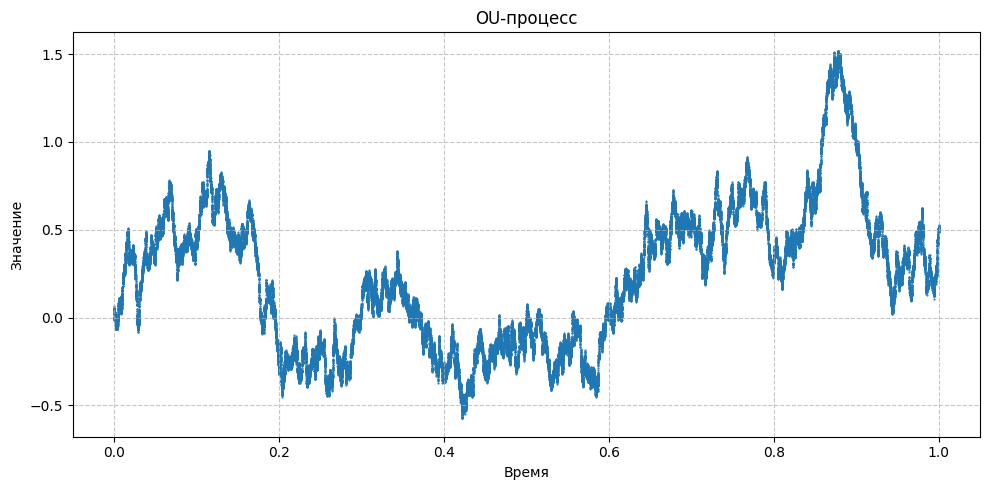

In [62]:
np.random.seed(42) # Для стабильности результата (если убрать, то будет произвольно)

plt.figure(figsize=(10, 5))

times, values = ornstein_uhlenbeck_midpoint(
    n_steps=15, 
    theta=1, 
    mu=0, 
    sigma=1
)
    
plt.scatter(times, values, s=0.3)
plt.title(f"OU-процесс")
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('9_2.eps', format='eps')
plt.show()

### Task 10

В задании следует рассмотреть дискретный одномерный фильтр Калмана для динамической системы вида:
$$
\begin{aligned}
x_{n+1} & =a \cdot x_n+\nu_n, \quad \nu_n \sim \mathcal{N}(0, q), \quad x_1 \sim \mathcal{N}\left(0, \sigma^2\right) \\
y_n & =x_n+\varepsilon_n, \quad \varepsilon_n \sim \mathcal{N}(0, r)
\end{aligned}
$$

Значение дисперсии шума $r$ считается известным еще на этапе генерации этого шума.
Для решения задачи рассмотрим равномерную сетку
$$
    h = \frac{1}{N},~ \{t_n = nh,~ n=\overline{0,1} \}, \\
    x_n = X(t_n),
$$
где $x_n$ - значения процесса Орнштейна-Уленбека в момент времени $t_n$.

Решим систему уравнений относительно неизвестных коэффициентов $a$ и $q$ через известные $\sigma$ и $\theta$:
$$
\left\{
    \begin{array}{l}
    \sigma^2=R\left(t_n, t_n\right)=\mathbb{Var}\left(x_n\right) \\
    \sigma^2 e^{-\theta h}=R\left(t_n, t_{n+1}\right)=\operatorname{Cov}\left(x_n, x_{n+1}\right)=a \cdot \mathbb{Var}\left(x_n\right) \\
    \sigma^2=R\left(t_{n+1}, t_{n+1}\right)=\mathbb{Var}\left(x_{n+1}\right)=a^2 \cdot \mathbb{Var}\left(x_n\right)+q
    \end{array}\right.
$$
После решения данной системы, получаем
$$
    a = e^{- \theta h},~ q= \sigma^2(1 - e^{-2 \theta h})
$$

Теперь опишем как будет происходить фильтрация. \




Алгоритм фильтра Калмана.

Фильтр Калмана используется для оценки состояния $x_n$ системы на основе зашумленных измерений $y_n$. Алгоритм состоит из трех этапов: инициализация, прогнозирование и обновление.  

Инициализация \
На первом шаге задаются начальные условия для фильтра:  
$$
\hat{x}_0 = 0, \quad P_0 = \sigma^2,
$$
где:  
$\hat{x}_0$ — начальная оценка состояния, принимается равной $0$;  
$P_0$ — начальная ковариация ошибки состояния, равная $\sigma^2$, которая отражает дисперсию процесса.  

Прогнозирование \
На каждом шаге $n$ фильтр Калмана предсказывает состояние на основе модели системы:  
$$
\hat{x}_{n|n-1} = a \hat{x}_{n-1}, \quad P_{n|n-1} = a^2 P_{n-1} + q,
$$
где:  
$\hat{x}_{n|n-1}$ — прогнозируемое состояние системы в момент $n$;  
$P_{n|n-1}$ — прогнозируемая ковариация ошибки состояния.  

Обновление\
После получения нового измерения $y_n$, фильтр обновляет состояние и его ковариацию.  

1. Вычисление коэффициента Калмана:
$$
K_n = \frac{P_{n|n-1}}{P_{n|n-1} + r},
$$
где:  
$K_n$ — коэффициент Калмана, определяющий вес нового измерения $y_n$;  
$r$ — дисперсия (или параметр масштаба в случае распределения Коши) белого шума.  

2. Оценка состояния:
$$
\hat{x}_n = \hat{x}_{n|n-1} + K_n \big(y_n - \hat{x}_{n|n-1}\big),
$$
где:  
$y_n$ — текущее наблюдение;  
$y_n - \hat{x}_{n|n-1}$ — остаток, отклонение наблюдения от прогнозируемого состояния.  

3. Обновление ковариации ошибки:
$$
P_n = (1 - K_n) P_{n|n-1},
$$
где $P_n$ — обновленная ковариация ошибки состояния.  


Итоговый процесс фильтрации
1. Инициализация: $\hat{x}_0$, $P_0$.  
2. Прогноз: $\hat{x}_{n|n-1}$, $P_{n|n-1}$.  
3. Обновление: $K_n$, $\hat{x}_n$, $P_n$.  

Процесс повторяется для каждого нового измерения $y_n$.  


In [63]:
def box_muller_one(n=1):
    if n < 0:
        raise Exception(f'Invalid size {n}')
   
    U1 = np.sqrt(-2 * np.log(np.random.rand(n)))
    U2 = 2 * np.pi * np.random.rand(n)
    Z0 = U1 * np.cos(U2)
    return Z0.squeeze()


In [64]:
def cauchy_distr(size=1000, x0=0, gamma=1):
    """
    Генерирует случайные числа с распределением Коши используя метод обратной функции
    
    Параметры:
    size (int): количество генерируемых чисел
    x0 (float): параметр положения (location parameter)
    gamma (float): параметр масштаба (scale parameter)
    """
    
    # Генерируем равномерно распределенные числа на интервале (0,1)
    u = np.random.uniform(0, 1, size)
    
    # Применяем обратную функцию распределения Коши:
    # F^(-1)(p) = x0 + gamma * tan(pi * (p - 0.5))
    cauchy = x0 + gamma * np.tan(np.pi * (u - 0.5))
    
    return cauchy

In [65]:
t, x_n = ornstein_uhlenbeck_midpoint(n_steps=12, theta=1, sigma=2) # 

In [66]:
size = t.shape


In [67]:
sigma = 1
r = 0.5
theta = 1

In [68]:
# Normal error
y_n = x_n + sigma * box_muller_one(size[0])

In [69]:
def filter_Kalman(y_n, sigma, theta, r):
    size = y_n.shape[0]
    h = t[1] - t[0] # считаю, что сетка равномерная
    a = np.exp(- theta * h)
    q = sigma ** 2 * (1 - np.exp(- 2 * theta * h))
    
    # first step 
    x_mid = np.zeros(size)
    P = np.zeros(size)
    P[0] = sigma ** 2
    Kn = np.zeros(size)
    P_tmp = np.zeros(size)
    
    for i in range(1, size):
        x_tmp = a * x_mid[i-1]
        P_tmp[i] = a ** 2 * P[i-1] + q
        Kn[i] = P_tmp[i] / (P_tmp[i] + r)
        x_mid[i] = x_tmp + Kn[i] * (y_n[i] - x_tmp)

        P[i] = (1 - Kn[i]) * P_tmp[i]

    return x_mid, P

In [70]:
x_filter, P = filter_Kalman(y_n, sigma, theta, r)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


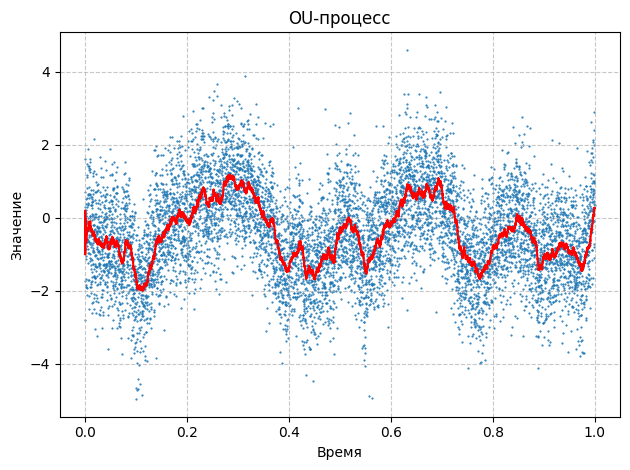

In [71]:
    
plt.scatter(t, y_n, s=0.3)
plt.plot(t, x_filter, color='r')
plt.title(f"OU-процесс")
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('10_1.eps', format='eps')
plt.show()

In [97]:
def plot_kalman_with_confidence_intervals(t, x_true, y_noisy, x_est, P_est, alpha=0.95):
    """
    Визуализация работы фильтра Калмана с отображением доверительных интервалов.

    Параметры:
    - t: массив временных отметок
    - x_true: истинная траектория (xn)
    - y_noisy: зашумленная траектория (yn)
    - x_est: оценки состояния (\hat{x}_n)
    - P_est: ковариации ошибок состояния (Pn)
    - alpha: уровень значимости (по умолчанию 0.95)
    """
    # Коэффициент kα для доверительного интервала
    k_alpha = norm.ppf(1 - (1 - alpha) / 2)
    
    # Верхняя и нижняя границы доверительного интервала
    confidence_upper = x_est + k_alpha * np.sqrt(P_est)
    confidence_lower = x_est - k_alpha * np.sqrt(P_est)

    # Построение графика
    plt.figure(figsize=(10, 6))

    # Истинная траектория
    plt.plot(t, x_true, label='True trajectory (x_n)', color='red', linewidth=1)
    
    # Зашумленная траектория
    #plt.scatter(t, y_noisy, label='Noisy observations (y_n)', color='blue', s=1)

    # Оценки фильтра Калмана
    plt.plot(t, x_est, label='Kalman filter estimates ($\\hat{x}_n$)', color='green', linewidth=2)

    # Доверительный интервал
    plt.fill_between(
        t, confidence_lower, confidence_upper, color='green', alpha=0.3,
        label=f'Confidence interval ({alpha*100:.1f}%)'
    )

    # Настройки графика
    plt.title("Kalman Filter with Confidence Intervals")
    plt.xlabel("Time")
    plt.ylabel("State")
    plt.legend(loc="best")
    plt.grid(True)

    plt.savefig('10_2(int).eps', format='eps')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


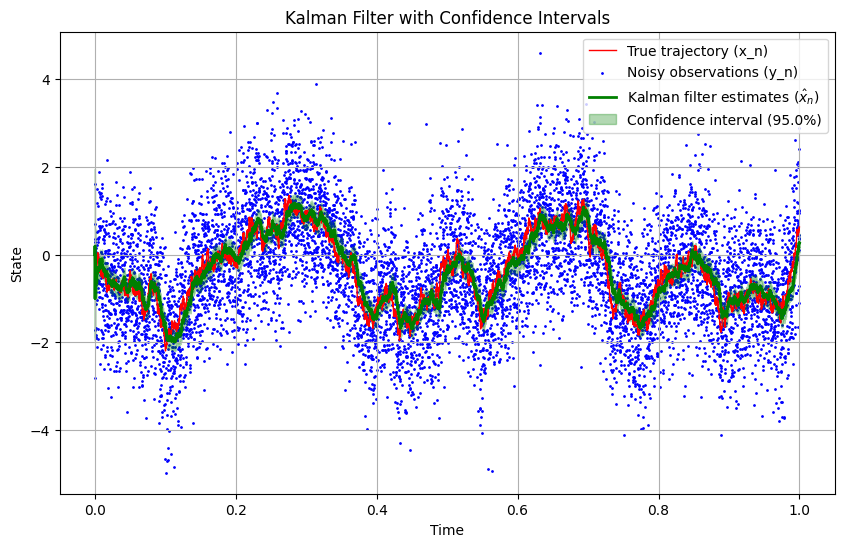

In [93]:
plot_kalman_with_confidence_intervals(t, x_n, y_n, x_filter, P)

Получился довольно маленьких доверительный интервал, поэтому вставляю картинку с истинной траекторией и доверительным интервалом

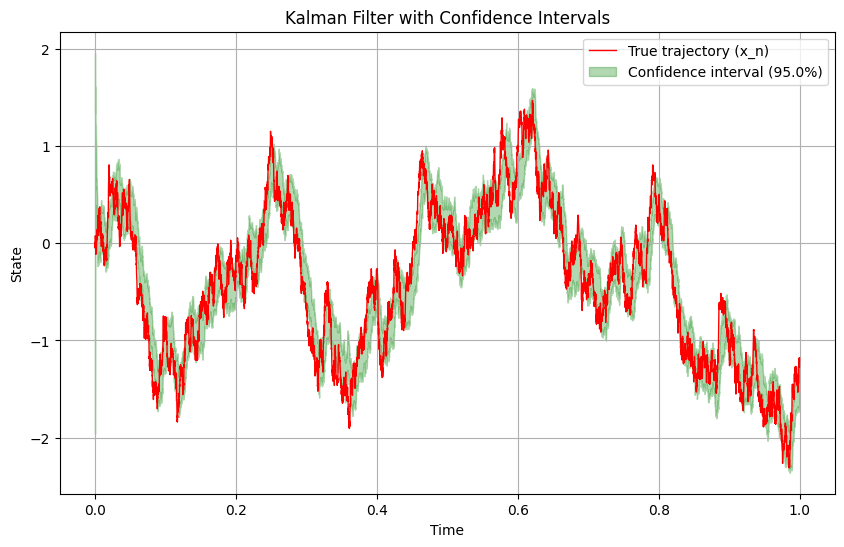

In [77]:
gamma = 0.9

In [78]:
# Cauchy error
y_n_cauchy = x_n + sigma * cauchy_distr(size[0], gamma=gamma)

In [79]:
upper_limit = np.percentile(y_n_cauchy, 99)
lower_limit = np.percentile(y_n_cauchy, 1)

In [80]:
y_n_cauchy.max()

2082.8245322975536

In [81]:
mask1 = (y_n_cauchy <= upper_limit)
mask2 = (y_n_cauchy >= lower_limit)

y_n_cauchy_masked = y_n_cauchy[mask1 & mask2]
t_masked = t[mask1 & mask2]


In [82]:
x_n_cauchy_masked = x_n[mask1 & mask2]

In [83]:
y_n_cauchy_masked.shape

(8029,)

In [84]:
x_filter_cauchy, P_cauchy = filter_Kalman(y_n, sigma, theta, gamma)


In [85]:
x_filter_cauchy_masked = x_filter_cauchy[mask1 & mask2]
P_cauchy_masked = P_cauchy[mask1 & mask2]

In [86]:
y_n_cauchy_masked.max()

25.235962658914023

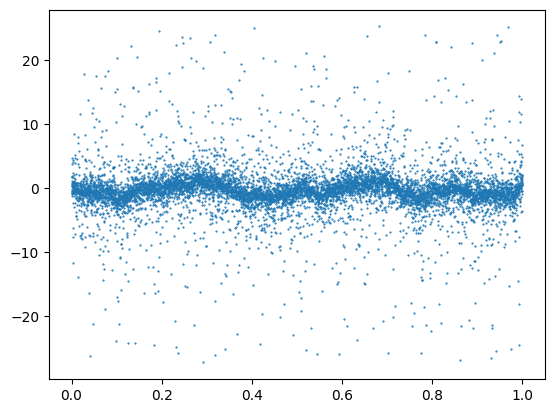

In [87]:

plt.scatter(t_masked, y_n_cauchy_masked, s=0.3)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


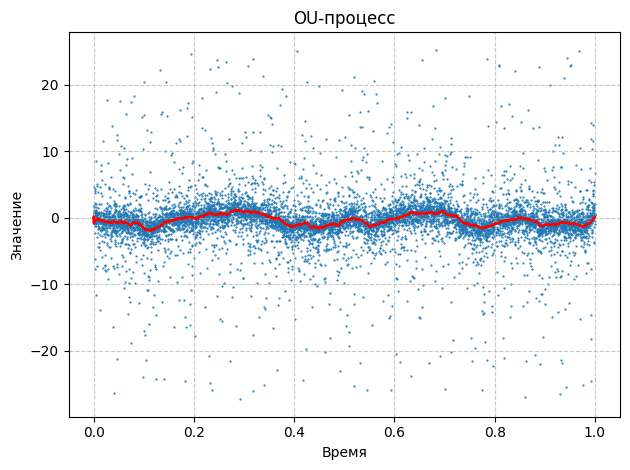

In [94]:
    
plt.scatter(t_masked, y_n_cauchy_masked, s=0.3)
plt.plot(t, x_filter_cauchy, color='r')
plt.title(f"OU-процесс")
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('10_2.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


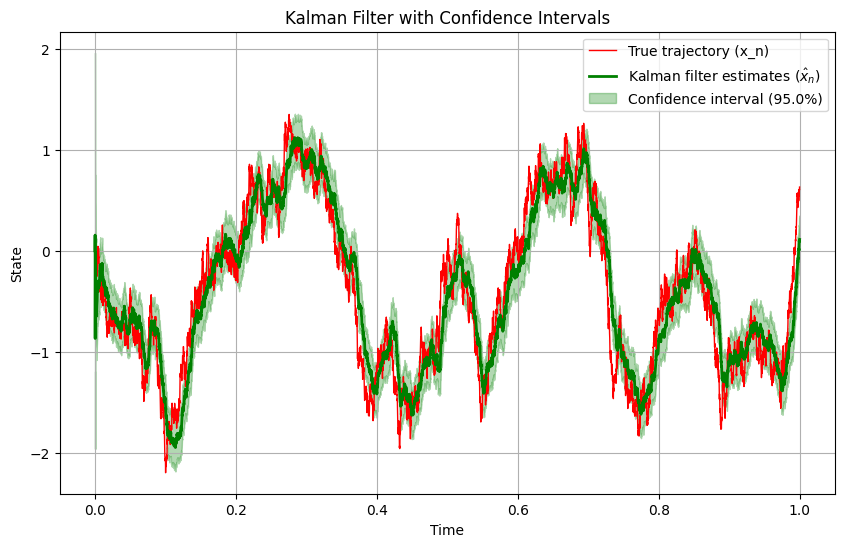

In [98]:
plot_kalman_with_confidence_intervals(t_masked, x_n_cauchy_masked, y_n_cauchy_masked, x_filter_cauchy_masked, P_cauchy_masked)

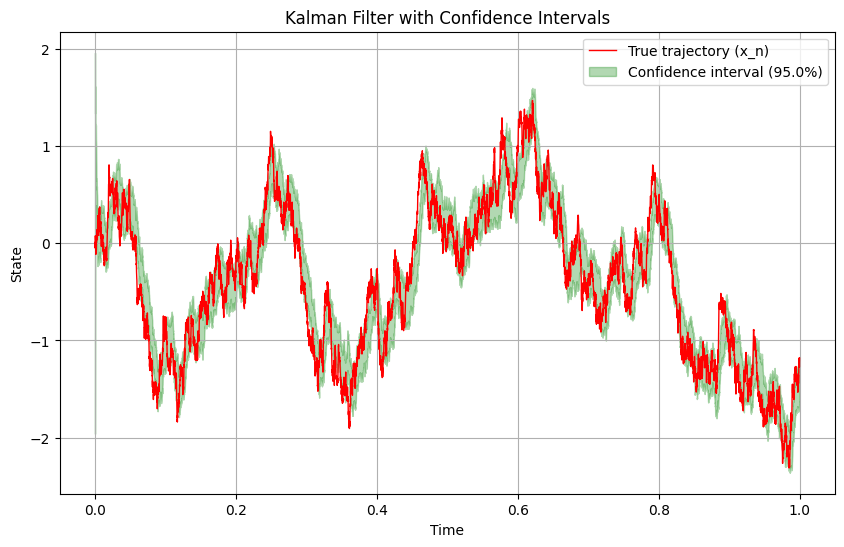

### Task 11

Построить двумерное пуассоновское поле, отвечающее сложному пуассоновскому процессу:
1. Система массового обслуживания. Первая координата поля — время поступления заявки в СМО (распределенное равномерно), а вторая — время обслуживания заявки (распределение $\chi^2$ с десятью степенями свободы).
2. Система массового обслуживания с циклической интенсивностью $\lambda(1+\cos(t))$ и
единичными скачками. При помощи метода Льюиса и Шедлеара, свести задачу
моделирования неоднородного пуассоновского процесса к моделированию двумерного пуассоновского поля, где первая координата распределена равномерно,
а вторая имеет распределение Бернулли.
3. Работа страховой компании: первая координата — момент наступления стра-
хового случая (равномерное распределение), вторая — величина ущерба (распределение Парето). Поступление капитала считать линейным по времени со скоростью $c > 0$, начальный капитал $W > 0$.

Чтобы определить Пуассоновское поле нам потребуется выполнения трёх пунктов.
1. Хаотичность, как независимость мер попарно непересекающихся множеств.
2. Пространственная однородность, как инвариатность относительно сдвига.
    - Это свойство может напоминать одно из альтернативных определений меры Лебега, с точностью домножения на константу.
3. Ординарность, как требование на отсутствие "сосредоточенности в одной окрестности" точек.

Работать с таким объектом будем с помощью считающих мер.
Считающая мера - мера, сосредоточенная не более, чем на счётном числе точек, обозначим множество этих точек $B$. Масса каждой точки будет равна единице. 
Определим $\nu(A) = |A \cap B|$ - количество точек во множестве $A$. \
Определим $\mu(A) = \mathbb{E} \nu(A)$ - среднее количество точек, попавнее в $A$. Одно из назнаний для такой величины - мера-интенсивность. \
Исходя из предъявленных требований, можем получить, что
$$
    \nu(A) \sim \mathbb{Pois}(\mu(A)).
$$




#### Task 11.1


В данной задаче необходимо смоделировать систему массового обслуживания, где:
1. первая координата --- время поступления заявки в СМО, распределённое равномерно;
2. вторая координата --- время обслуживания заявки, распределённое по $\chi^2$ с $df=10$ степенями свободы.

В системе массового обслуживания будем работать на отрезке времени $[0;T]$. Введём случайную величину $\xi \sim Pois (\lambda T)$, где $\frac{1}{\lambda}$ - среднее время поступления заявки. Соответственно, $\xi$ - общее количество заявок.


Шаги моделирования с учётом того, что могут появляться очереди

1. **Генерация времени поступления заявок**:
   $$
   t_i \sim U(0, T), \, i = 1, \dots, N.
   $$
   И работать мы будем с вариационным рядом, чтобы отсортировать время поступления заявки.
   
2. **Генерация времени обслуживания**:
   - Для каждого $i$ генерируем время обслуживания заявки:
   $$
   s_i \sim \chi^2(k).
   $$

3. **Учёт очередей**:
   - Вычисляем момент завершения обслуживания каждой заявки:
   $$
   c_i = \max(t_i, c_{i-1}) + s_i, \quad c_0 = s_0.
   $$

Для оценки качества работы системы будем считать количество заявок в очереди в момент времени $t$:
$$
   N(t) = \sum^{\xi}_{i=1} t_{(i)} \leqslant t \leqslant c_i.
$$
Сколько заявок поступило, но ещё не было обработано.

Среднее время обработки заявки - это математическое ожидание $s_i$, оно равно количеству степеней свободы в системе (В данном случае $df=10$). \
Таким образом, у нас могут быть 3 режима работы исходя из соотношения $\frac{1}{\lambda} \vee 10$, перепишем иначе $\lambda \vee \frac{1}{10}$:
1. Если $\lambda$  меньше, то заявки будут поступать дольше, чем обрабатываться, следовательно система будет справляться.
2. Если $\lambda = \frac{1}{10}$, то система будет находиться в так называемом "равновесии", где примерно одинаково заявки будут набираться и обрабатываться.
3. Если $\lambda$  больше, то заявки будут поступать быстрее, чем обрабатываться, следовательно система не будет справляться, и очередь будет набираться.

In [99]:
def poisson_generator(lmbd, size=1):
    """
    Generates Poisson random variables using the exponential distribution.

    Args:
        lambda_: The rate parameter of the Poisson distribution.
        size: The number of samples to generate.

    Returns:
        A NumPy array of Poisson random variables.
    """
    if lmbd < 0:
        raise Exception(f'This is not lambda, given {lmbd}, must be positive')
    # Determine the maximum possible value for efficiency
    max_value = int(np.ceil(lmbd * 3))

    # Generate a matrix of exponentially distributed random variables
    exp_matrix = np.random.exponential(scale=1/lmbd, size=(max_value+1, size))

    # Calculate cumulative sums along each column
    cumsum_matrix = np.cumsum(exp_matrix, axis=0)

    # Find the first index where the cumulative sum exceeds 1 for each column
    indices = np.argmax(cumsum_matrix > 1, axis=0)

    return indices

In [100]:
def queue_system(lmbd, T=100):
    df = 10 # degrees of freedom for chi^2
    xi = poisson_generator(lmbd=lmbd * T, size=1)
    xi = xi[0]
    if xi == 0:
        raise Exception(f'We have zero requests')
    t_i = np.random.uniform(0, T, size=xi)
    t_i_sort = np.sort(t_i)
    s_i = np.random.chisquare(df, xi)

    c_i = np.zeros(xi)
    c_i[0] = s_i[0] + t_i_sort[0]
    for i in range(1, xi):
        c_i[i] = max(c_i[i-1], t_i_sort[i]) + s_i[i]

    N_t = lambda t: np.sum((t_i_sort <= t) & (t <= c_i))
    return t_i_sort, s_i, c_i, N_t
    #return c_i, N_t

In [101]:
queue_system(0.1)

(array([13.72255881, 15.72576729, 19.26005253, 20.4893029 , 27.97856888,
        56.18203584, 57.97253983, 73.86941322, 93.09710716]),
 array([ 6.13815355,  9.94240183, 17.77983063, 10.37681673,  5.00136014,
        15.50290711, 13.26905502,  7.09595242, 10.48287491]),
 array([ 19.86071236,  29.8031142 ,  47.58294483,  57.95976156,
         62.9611217 ,  78.46402881,  91.73308383,  98.82903625,
        109.31191115]),
 <function __main__.queue_system.<locals>.<lambda>(t)>)

In [112]:
def visualize_queue_system(lmbd, T=100):
    """
    Визуализация системы массового обслуживания
    
    Параметры:
    - lmbd: интенсивность поступления заявок
    - T: интервал времени
    """
    # Получаем результаты симуляции
    t_i_sort, s_i, c_i, N_t = queue_system(lmbd, T)
    
    # Создаем сетку точек для визуализации очереди
    t_grid = np.linspace(0, T, 200)
    queue_lengths = [N_t(t) for t in t_grid]
    
    # Визуализация
    plt.figure(figsize=(14, 10))
    
    # График длины очереди
    plt.subplot(2, 1, 1)
    plt.plot(t_grid, queue_lengths, label='Длина очереди')
    # Точки поступления внизу
    for t in t_i_sort:
        plt.axvline(x=t, color='r', linestyle='--', alpha=0.3, 
                label='Поступление заявки' if t == t_i_sort[0] else '')
        
    plt.title(f'Длина очереди (λ = {lmbd})')
    plt.xlabel('Время')
    plt.ylabel('Количество заявок')
    plt.legend()
    plt.grid(True)
    
    # Диаграмма Ганта для обслуживания заявок
    plt.subplot(2, 1, 2)
    for i in range(len(t_i_sort)):
        # Полоса обслуживания
        plt.plot([t_i_sort[i], c_i[i]], [i, i], 'ro-', linewidth=2)
    
    
    plt.title('Диаграмма обслуживания заявок')
    plt.xlabel('Время')
    plt.ylabel('Номер заявки')
    plt.ylim(-1, len(t_i_sort))  # Расширяем график, чтобы показать точки поступления
    plt.grid(True)
    
    plt.tight_layout()

    plt.savefig('11_1(2).eps', format='eps')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


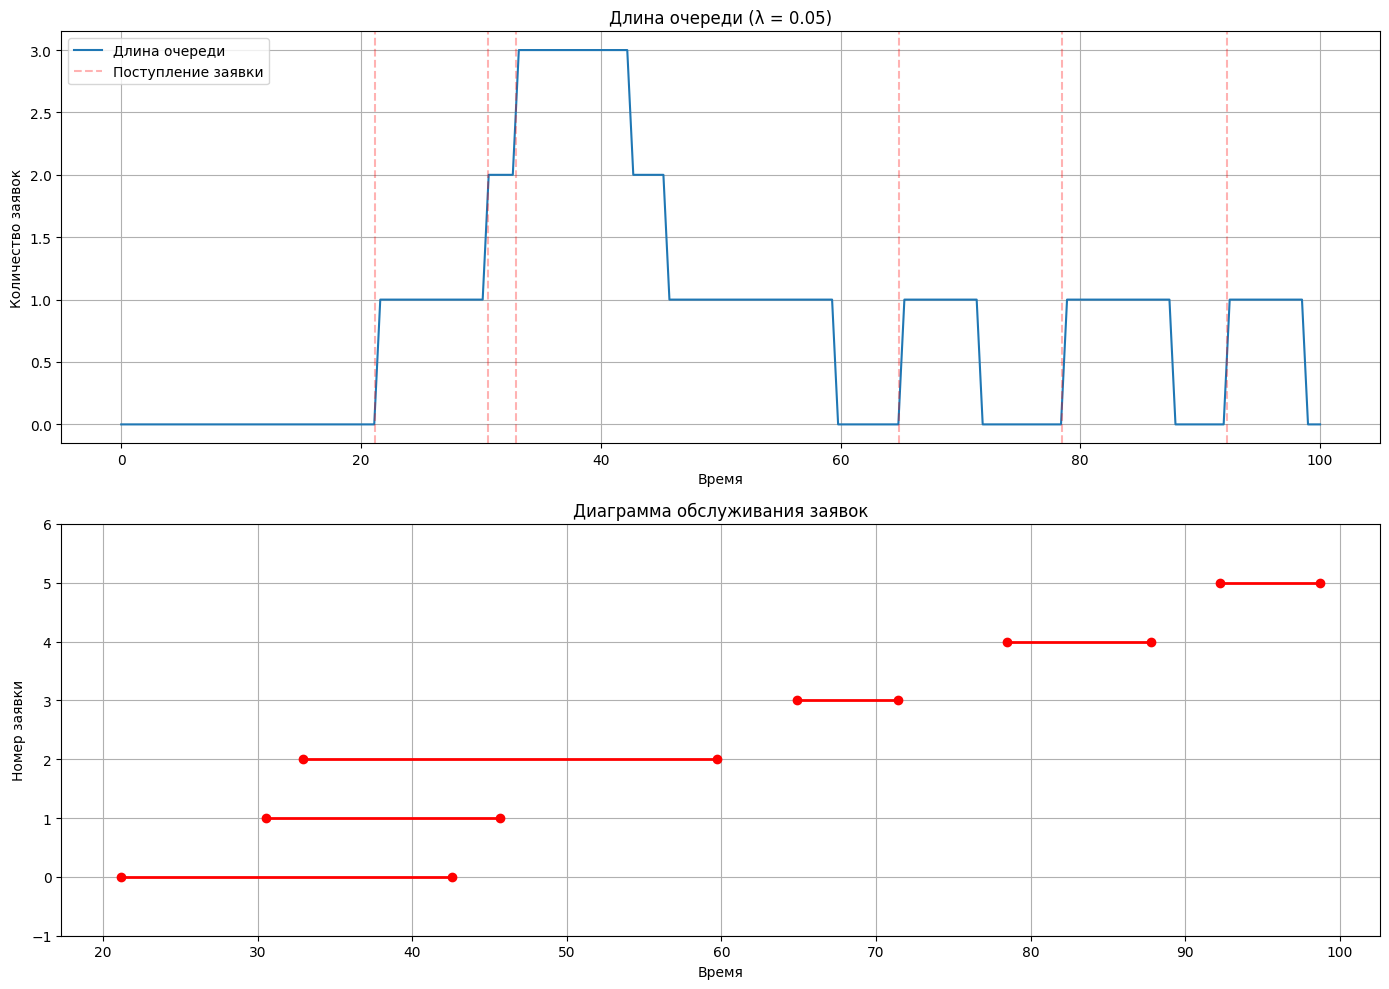

In [107]:

# Пример использования, когда система справляется
visualize_queue_system(lmbd=0.05, T=100)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


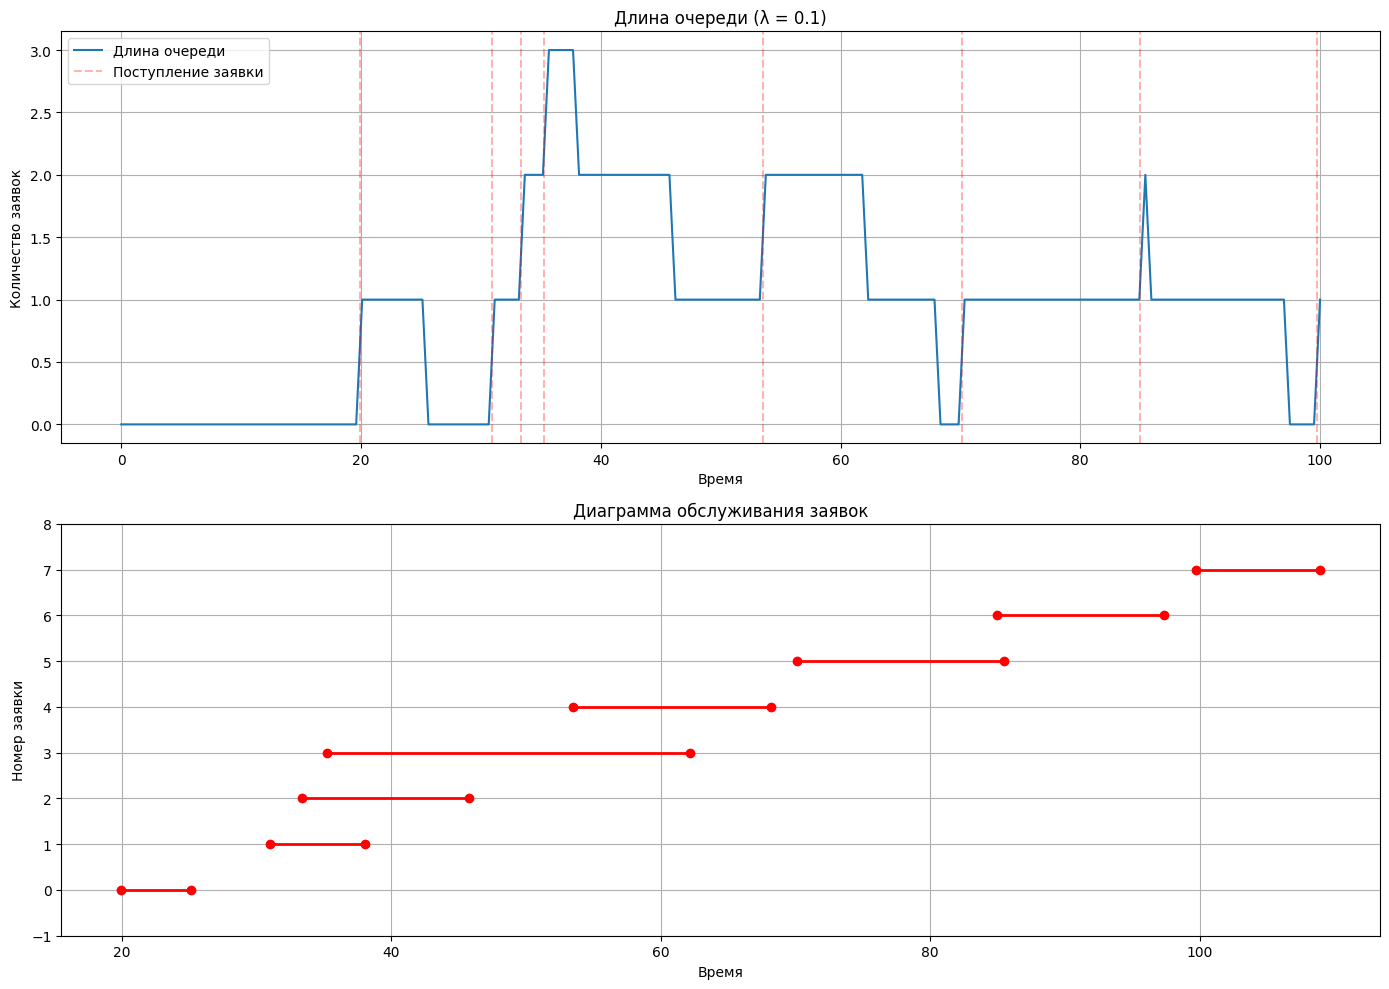

In [114]:

# Пример использования, когда система в равновесии
visualize_queue_system(lmbd=0.1, T=100)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


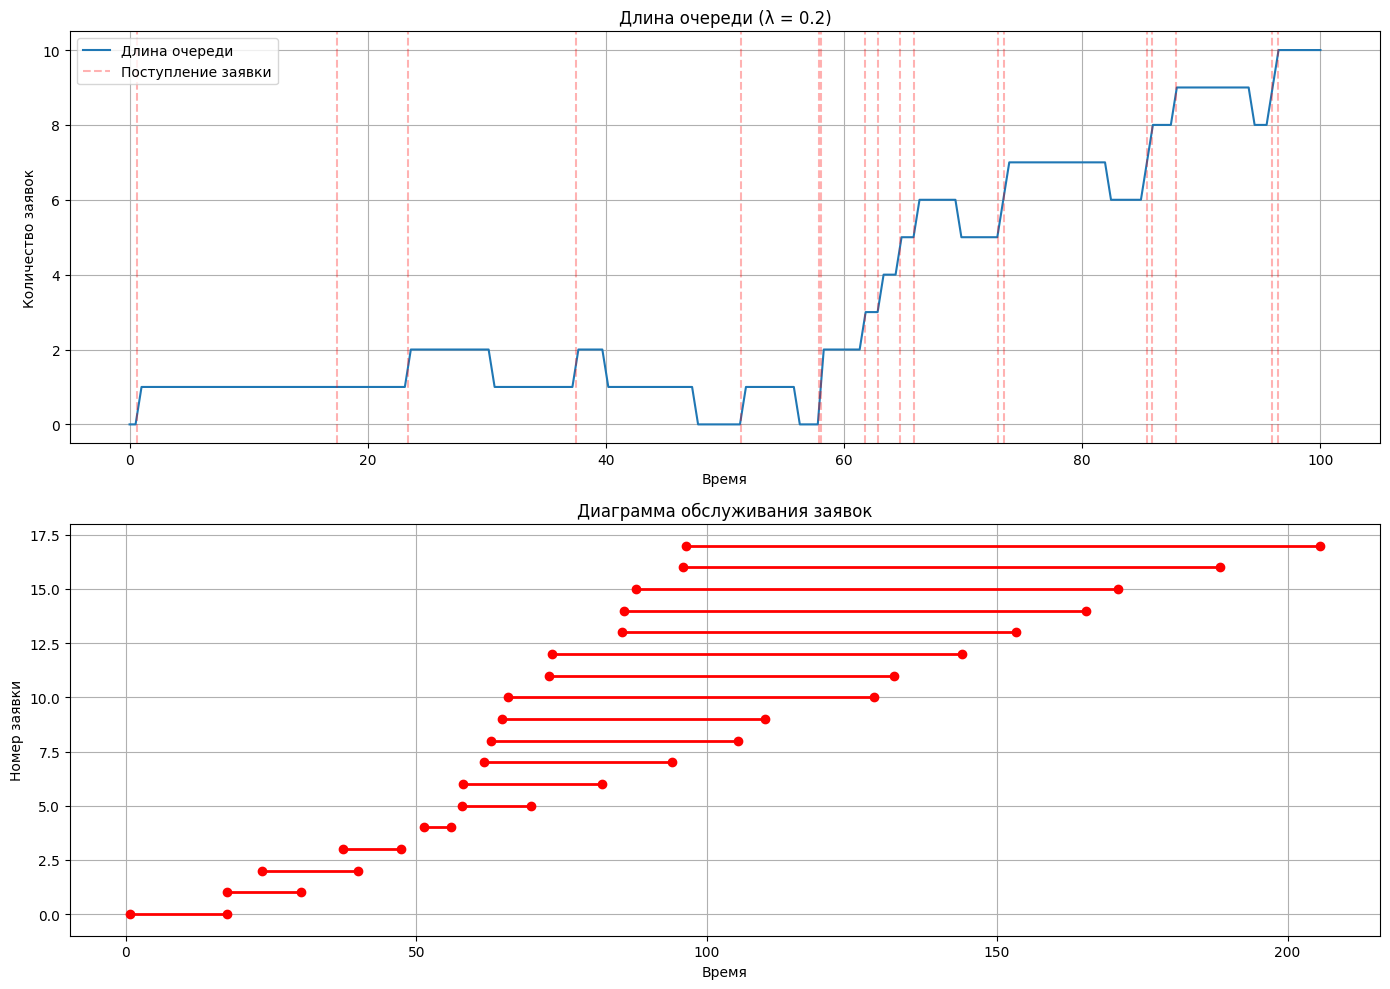

In [111]:

# Пример использования, когда система не справляется
visualize_queue_system(lmbd=0.2, T=100)

### Task 11.2

Нам предложена система массового обслуживания с переменной интенсивностью поступления заявок, описываемой функцией $\lambda(t)=\lambda(1+\cos(t))$.\
Это означает, что интенсивность потока заявок периодически меняется с течением времени.


Двумерное пуассоновское поле:
Мы будем генерировать точки на плоскоти $(t, u)$, где $t$ - время, а $u$ - случайная величина, распределенная по Бернулли.\
Если значение $u$ в точке $(t, u)$ равно $1$, то в момент времени $t$ происходит событие (поступление заявки).

Математическая постановка и алгоритм
1. Определение интенсивности:

$\lambda(t)=\lambda(1+\cos(t))$ - интенсивность поступления заявок в момент времени $t$. 
2. Преобразование к однородному пуассоновскому процессу:

Введем функцию 
$$
\Lambda(t) = \int_0^t \lambda(s) ds = \lambda(t + \sin(t)),
$$
которая определяет среднее число событий на интервале $[0; t]$. С помощью данной величины определим $\mu_0 = \Lambda(T) - \Lambda(0) = \Lambda(T)$. \
Таким образом, мы получили параметр пуассоновского процесса для генерации $\xi \sim Pois(\mu_0)$. \
Несложно получить, что $\lambda_{max} = 2 \lambda$ (максимальное значение $\lambda(t)$).\
Сгенерируем точки на плоскоти $(t, u)$, где $t$ распределено равномерно на отрезке $[0; T]$, а $u$ распределено по Бернулли с вероятностью успеха $p(t)= \frac{\lambda(t)}{\lambda_{max}}$. \
3. Отбор событий:

Оставим только те точки $(t, u)$, для которых $u = 1$. Эти точки соответствуют моментам поступления заявок в исходном неоднородном процессе.\
4. Моделирование времени обслуживания:

Для каждой заявки сгенерируем время обслуживания из распределения χ 
2
  с 10 степенями свободы.
5. Моделирование очереди:

Генерация точек на плоскости:
$$
(t_i, u_i) \sim U(0, T) \times Bern\left(\frac{\lambda(t_i)}{\lambda_{max}}\right), \quad i = 1, \dots, \xi
$$
где $\xi$ - общее число сгенерированных точек.

Отбор событий:
$$
\text{Если } u_i = 1, \text{ то } t_i \text{ - момент поступления заявки.}
$$


Если добавим время обслуживания, как в первой задаче, то получаем аналогичные выводы

In [115]:
def cyclic_queue_system(lmbd : int | float =0.1, T : int=100):
    mu_0 = lmbd * (T + np.sin(T))
    lmbd_max = 2 * lmbd

    xi = poisson_generator(lmbd=mu_0, size=1)
    xi = xi[0]
    if xi == 0:
        raise Exception(f'We have zero requests')
    t_i = np.random.uniform(0, T, size=xi)
    t_i_sort = np.sort(t_i)
    
    lmbd_t = lmbd * (1 + np.cos(t_i_sort))
    
    u_i = np.empty(xi)

    for i in range(xi):
        p = lmbd_t[i] / lmbd_max
        u_i[i] = Bernoulli_schemes(p, size=1)[0]

    mask = u_i == 1
    count = np.sum(mask)
    if count == 0:
        raise Exception(f'We have zero requests in the end')
    
    res_u = u_i[mask]
    res_t = t_i_sort[mask]
    N_t = lambda t: np.sum((t_i_sort <= t))
    return res_t, res_u, N_t
    #return t_i_sort, s_i, c_i, N_t
    #return c_i, N_t
    

In [116]:
def cyclic_queue_system_chi2(lmbd : int | float =0.1, T : int=100):
    df = 10 # degrees of freedom for chi^2
    

    mu_0 = lmbd * (T + np.sin(T))
    lmbd_max = 2 * lmbd

    xi = poisson_generator(lmbd=mu_0, size=1)
    xi = xi[0]
    if xi == 0:
        raise Exception(f'We have zero requests')
    t_i = np.random.uniform(0, T, size=xi)
    t_i_sort = np.sort(t_i)
    
    lmbd_t = lmbd * (1 + np.cos(t_i_sort))
    
    s_i = np.random.chisquare(df, xi)
    
    u_i = np.empty(xi)

    c_i = np.empty(xi)
    c_i[0] = s_i[0] + t_i_sort[0]

    for i in range(xi):
        p = lmbd_t[i] / lmbd_max
        val = Bernoulli_schemes(p, size=1)[0]
        u_i[i] = val
        if val == 1:
            c_i[i] = max(c_i[i-1], t_i_sort[i]) + s_i[i]

    mask = u_i == 1
    count = np.sum(mask)
    if count == 0:
        raise Exception(f'We have zero requests in the end')
    
    res_u = u_i[mask]
    res_t = t_i_sort[mask]
    #res_s = s_i[mask]
    res_c = c_i[mask]
    N_t = lambda t: np.sum((res_t <= t) & (t <= res_c))
    return res_t, res_u, res_c,  N_t
    #return t_i_sort, s_i, c_i, N_t
    #return c_i, N_t
    

In [117]:
cyclic_queue_system()

(array([32.25465014, 79.7099181 ]),
 array([1., 1.]),
 <function __main__.cyclic_queue_system.<locals>.<lambda>(t)>)

In [118]:
def visualize_cyclic_queue_system(lmbd, T=100):
    """
    Визуализация системы массового обслуживания
    
    Параметры:
    - lmbd: интенсивность поступления заявок
    - T: интервал времени
    """
    # Получаем результаты симуляции
    t_i_sort, u_i, c_i, N_t = cyclic_queue_system_chi2(lmbd, T)
    
    # Создаем сетку точек для визуализации очереди
    t_grid = np.linspace(0, T, 200)
    queue_lengths = [N_t(t) for t in t_grid]
    
    # Визуализация
    plt.figure(figsize=(14, 10))
    
    # График длины очереди
    plt.subplot(2, 1, 1)
    plt.plot(t_grid, queue_lengths, label='Длина очереди')
    # Точки поступления внизу
    for t in t_i_sort:
        plt.axvline(x=t, color='r', linestyle='--', alpha=0.3, 
                label='Поступление заявки' if t == t_i_sort[0] else '')
        
    plt.title(f'Длина очереди (λ = {lmbd})')
    plt.xlabel('Время')
    plt.ylabel('Количество заявок')
    plt.legend()
    plt.grid(True)
    
    # Диаграмма Ганта для обслуживания заявок
    plt.subplot(2, 1, 2)
    for i in range(len(t_i_sort)):
        # Полоса обслуживания
        plt.plot([t_i_sort[i], c_i[i]], [i, i], 'ro-', linewidth=2)
    
    
    plt.title('Диаграмма обслуживания заявок')
    plt.xlabel('Время')
    plt.ylabel('Номер заявки')
    plt.ylim(-1, len(t_i_sort))  # Расширяем график, чтобы показать точки поступления
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('11_2.eps', format='eps')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


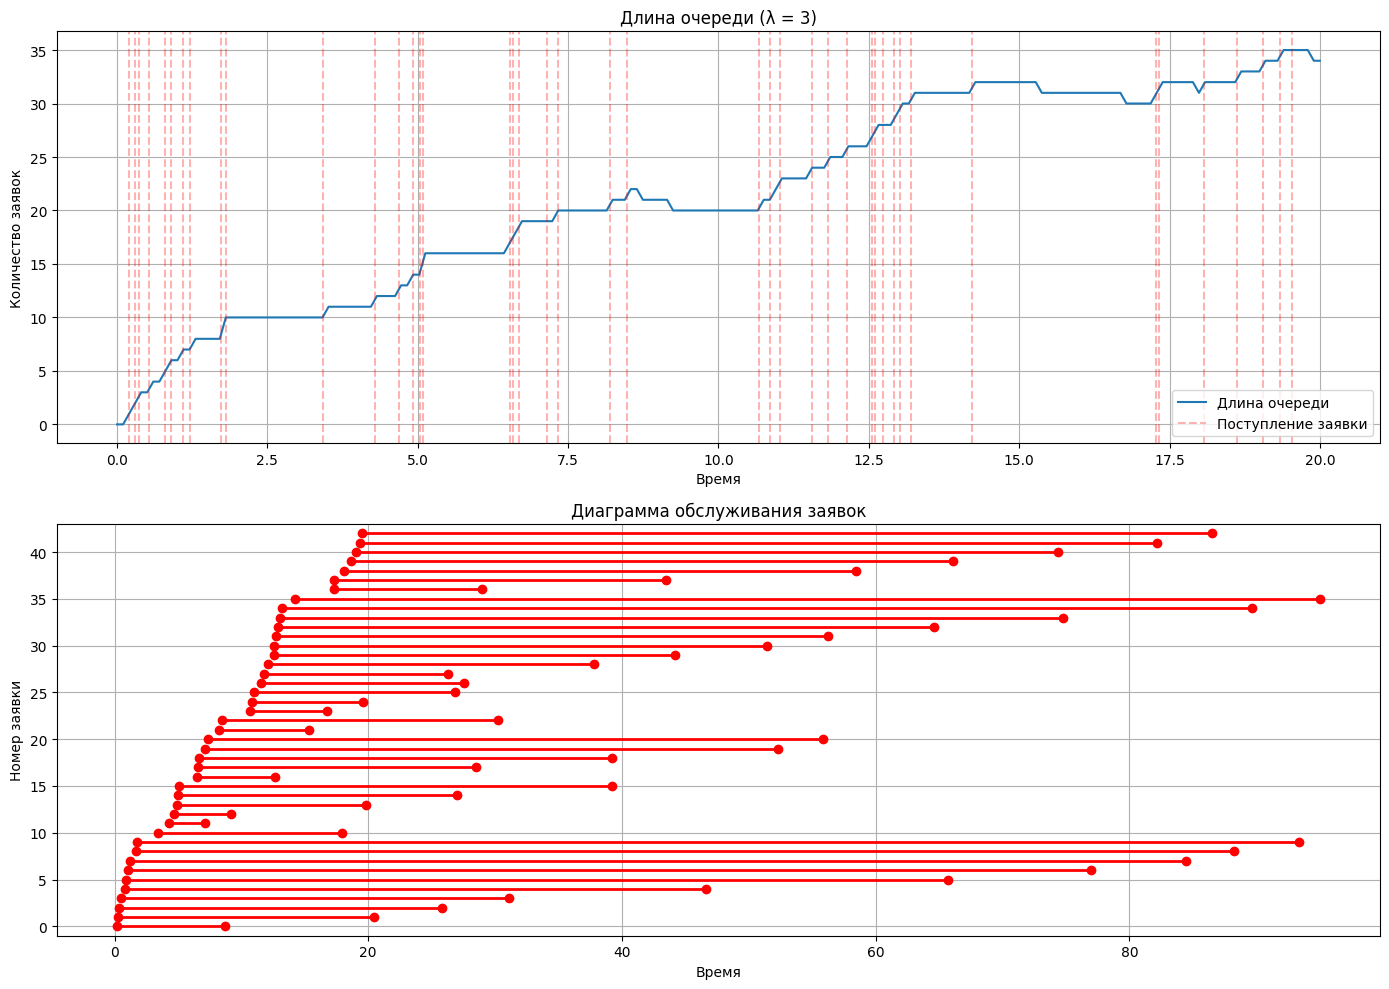

In [123]:
visualize_cyclic_queue_system(lmbd=3, T=20)

### Task 11.3

Работа страховой компании: первая координата — момент наступления страхового случая (равномерное распределение), вторая — величина ущерба (распределение Парето). Поступление капитала считать линейным по времени со скоростью $c > 0$, начальный капитал $W > 0$.


В данной системе также будем работать на отрезке времени $[0;T]$. Введём случайную величину $\xi \sim Pois (\lambda T)$, где $\frac{1}{\lambda}$ - среднее время наступления страхового случая.\
Соответственно, $\xi$ - общее количество случаев.

1. **Генерация времени наступления случаев**:
   $$
   t_i \sim U(0, T), \, i = 1, \dots, N.
   $$
   И работать мы будем с вариационным рядом, чтобы отсортировать время "краха".
   
2. **Генерация момента**:
   - Для каждого $i$ генерируем величину ущерба:
   $$
   s_i \sim P(k, x_m),
   $$
   $x_m$ - коэффициент масштаба


Выпишем зависимость капитала от времени
$$
    K(t) = W + ct - \sum_{k=1}^{\xi}s_i
$$
Будем считать, что капитал неотрицательный, поэтому если получается иное, то заключаем, что компания банкротится.

Случайная величина с распределением Парето имеет бесконечное математическое ожидание при $k \leqslant 1$, поэтому в таком режиме компания рано или поздно объявит своё банкротство. 

Выпишем функцию 
Распределение Парето и его функция распределения
Функция распределения F(x) для распределения Парето с параметрами (a, b) имеет вид:
$$
F(x) = 1 - (a/x)^b,  для x >= a
$$
Обратная функция к F(x) будет:

x = F⁻¹(u) = a / (1-u)^(1/b)


Пусть $X$ – случайная величина, имеющая распределение Парето с параметрами $(a, b)$. 
Функция распределения $X$ имеет вид:
$$
F(x) = 1 - \left(\frac{x_m}{x}\right)^k, \quad x \geqslant x_m.
$$
Обратная функция к $F(x)$:
$$
x = F^{-1}(u) = \frac{x_m}{(1-u)^{1/k}},
$$
где $u$ – случайное число, равномерно распределенное на отрезке $[0, 1]$. Однако, в данном случае $u$ и $1-u$ принадлежат одному распределению, можем переписать в виде
$$
x = F^{-1}(u) = \frac{x_m}{(u)^{1/k}}.
$$

Можем выписать ожидаемый капитал в каждый момент времени
$$
    \mathbb{E}K(t) = W + ct - \lambda t \frac{k x_m}{k-1}.
$$
При $ c - \lambda \frac{k x_m}{k - 1} > 0$, мы ожидаем, что капитал в среднем растёт. В противном случае, убывать, и через какое-то время разоряться.

In [124]:
def bankruptcy_system(W, lmbd, T, c, k, x_m=1):
    xi = poisson_generator(lmbd * T)
    # Генерация моментов наступления страховых случаев (равномерное распределение)
    event_times = np.sort(np.random.uniform(0, T, size=xi))

    # Генерация величины ущербов (Парето-распределение)
    damage_values = x_m / np.random.uniform(0, 1, size=xi)**(1 / k)

    # Расчет капитала в каждый момент времени
    n_points = 1000
    time_points = np.linspace(0, T, n_points)  # Шаги времени для анализа капитала
    capital = np.full_like(time_points, W) + c * time_points  # Начальный капитал + линейное поступление

    # Вычитаем ущерб по мере наступления страховых случаев
    for i, t in enumerate(event_times):
        capital[time_points >= t] -= damage_values[i]

    return time_points, capital, event_times, damage_values, 

In [125]:
T = 200  # Время моделирования (отрезок [0; T])
W = 1000  # Начальный капитал
c = 30  # Скорость поступления капитала
lmbd = 0.2 # Интенсивность наступления страховых случаев (1/lambda - среднее время между случаями)
k = 25  # Параметр формы распределения Парето (k > 1)
x_m = 100  # Параметр масштаба распределения Парето

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


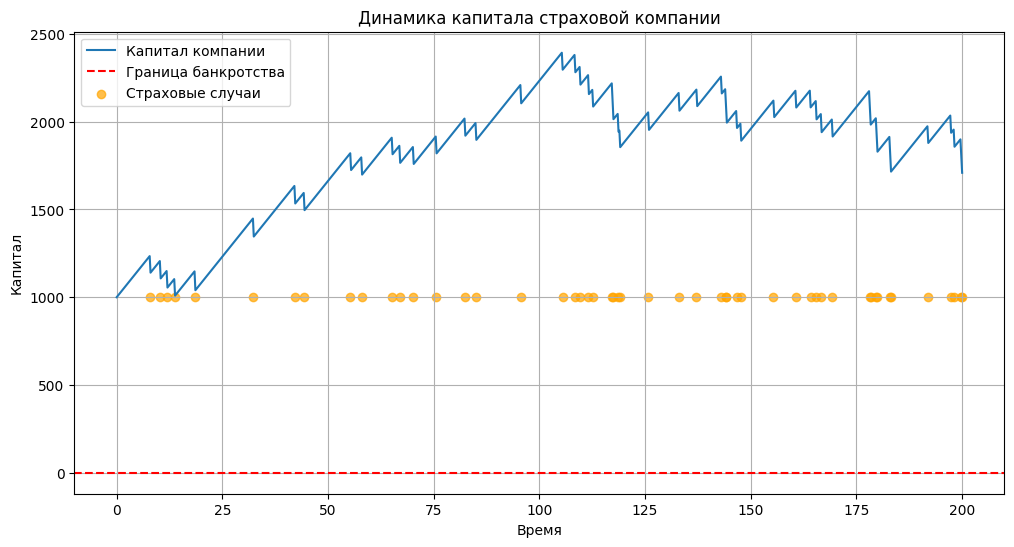

Компания не обанкротилась за время моделирования.


In [126]:
time_points, capital, event_times, damage_values = bankruptcy_system(W, lmbd, T, c, k, x_m=x_m)

# Проверка на банкротство
bankruptcy_time = None
if np.any(capital < 0):
    bankruptcy_time = time_points[np.where(capital < 0)[0][0]]

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(time_points, capital, label="Капитал компании")
plt.axhline(0, color='red', linestyle='--', label="Граница банкротства")
plt.scatter(event_times, np.full_like(event_times, W), color='orange', label="Страховые случаи", alpha=0.7)
if bankruptcy_time:
    plt.axvline(bankruptcy_time, color='purple', linestyle='--', label=f"Банкротство: t={bankruptcy_time:.2f}")
plt.title("Динамика капитала страховой компании")
plt.xlabel("Время")
plt.ylabel("Капитал")
plt.legend()
plt.grid(True)
plt.savefig('11_3.eps', format='eps')
plt.show()

# Вывод результатов
if bankruptcy_time:
    print(f"Компания обанкротилась на {bankruptcy_time:.2f} единицах времени.")
else:
    print("Компания не обанкротилась за время моделирования.")